In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [2]:
# //////1.1

# read the StarWars.csv seperated by ',' with 'RespondentID' as the index col and first two rows as headers
starwars_df = pd.read_csv('StarWars.csv', header=[0,1], sep=',', encoding= 'unicode_escape', index_col=0)

# assign the column names separately as the 'names' parameter in the read_csv() does not rename multiindex columns 
starwars_df.columns = ['seen_movie_col','starwars_fan_col','Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith',
         'Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi',
         'rank_movie1', 'rank_movie2','rank_movie3', 'rank_movie4', 'rank_movie5', 'rank_movie6',
         'Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda',
         'char_shot_first_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col', 
         'Gender', 'Age', 'Household Income', 'Education', 'Location']


In [3]:
# create arrays to store movie names and character names for easy access
movie = ['Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
characters = ['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda']
rank_cols = ['rank_movie1', 'rank_movie2','rank_movie3', 'rank_movie4', 'rank_movie5', 'rank_movie6']

# Reference: [10]
# create lists to store colors for different plots
yes_no_colors = ['teal','lightgreen', 'gold']
rating_colors = ['crimson','cyan','lightgreen','pink', 'lightblue', 'gold']
average_ratings_colors = ['lightgoldenrodyellow', 'gold', 'darkorange', 'violet', 'mediumorchid', 'purple']
gender_colors = ['pink', 'powderblue', 'red']
age_colors = ['maroon', 'rosybrown','lightcoral','orangered', 'orange']
education_colors = ['gold', 'darkorange', 'lightgreen', 'teal', 'red', 'bisque']
income_colors = ['slategray','silver', 'lightblue', 'steelblue', 'dodgerblue', 'navy']
location_colors = ['saddlebrown', 'sandybrown', 'peachpuff', 'linen', 'darksalmon', 'gold', 'darkorange', 'red', 'pink', 'plum']
red_patch_colors = ['mistyrose', 'rosybrown','lightcoral','orangered','firebrick', 'maroon']
stacked_character_colors = ['teal', 'lightseagreen', 'aquamarine', 'powderblue', 'moccasin','orange']

In [4]:
# //////1.2

# categories for different columns (Some categories have been added for few columns which will serve
# as the values to fill the missing NaNs')
yes_no_category = ["YES", "NO", "I DON'T UNDERSTAND THIS QUESTION"]
movie_category = np.append(np.char.upper(movie), 'NOT WATCHED')
rank_category = [1, 2, 3, 4, 5, 6]
characters_category = ['VERY FAVORABLY', 'SOMEWHAT FAVORABLY', 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)', 'SOMEWHAT UNFAVORABLY', 'VERY UNFAVORABLY', 'UNFAMILIAR (N/A)']
gender_category = ['FEMALE', 'MALE', 'PREFER NOT TO ANSWER']
age_category = ['18-29','30-44', '45-60', '> 60', 'PREFER NOT TO ANSWER']
income_category = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+', 'PREFER NOT TO ANSWER']
education_category = ['BACHELOR DEGREE', 'SOME COLLEGE OR ASSOCIATE DEGREE', 'GRADUATE DEGREE', 'HIGH SCHOOL DEGREE', 'LESS THAN HIGH SCHOOL DEGREE', 'PREFER NOT TO ANSWER']
location_category = ['PACIFIC', 'SOUTH ATLANTIC', 'EAST NORTH CENTRAL', 'MIDDLE ATLANTIC', 'WEST NORTH CENTRAL', 'WEST SOUTH CENTRAL', 'MOUNTAIN', 'NEW ENGLAND', 'EAST SOUTH CENTRAL', 'PREFER NOT TO ANSWER']

# appropriate dtypes are assigned to the columns after Task 1.3 and 1.4 as after using applymap() function the dtypes of the 
# string columns are changed to 'object' again
def assignAppropDtypes():
    
    # Reference: [2]
    # UNORDERED Categories
    
    # create an array of columns containg Yes/No category and assign yes_no_category
    yes_no_cols = ['seen_movie_col', 'starwars_fan_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col']
    for column in yes_no_cols:
        starwars_df[column] = starwars_df[column].astype(pd.api.types.CategoricalDtype(categories=yes_no_category))

    # convert the 'Select the movies you have seen' (6 columns) to movie_category
    for single_movie in movie:
        starwars_df[single_movie] = starwars_df[single_movie].astype(pd.api.types.CategoricalDtype(categories=movie_category))

    # assign gender_category, education_category & location_category to respective columns
    starwars_df['Gender'] = starwars_df['Gender'].astype(pd.api.types.CategoricalDtype(categories=gender_category))
    starwars_df['Education'] = starwars_df['Education'].astype(pd.api.types.CategoricalDtype(categories=education_category))
    starwars_df['Location'] = starwars_df['Location'].astype(pd.api.types.CategoricalDtype(categories=location_category))

    # convert the 'Which character was shot first' to type category
    starwars_df['char_shot_first_col'] = starwars_df['char_shot_first_col'].astype('category')

    # ORDERED Categories

    # assing the character_category to 'Please state whether you view following character as ...' (14 columns)
    for character in characters:
        starwars_df[character] = starwars_df[character].astype(pd.api.types.CategoricalDtype(categories=characters_category, ordered=True))

    # assign the 'age_category' and 'income_category' to respective columns
    starwars_df['Age'] = starwars_df['Age'].astype(pd.api.types.CategoricalDtype(categories=age_category, ordered=True))
    starwars_df['Household Income'] = starwars_df['Household Income'].astype(pd.api.types.CategoricalDtype(categories=income_category, ordered=True))
    

In [5]:
# //////1.3

# remove Female/Male typos from Gender column
female_typo_mask = (starwars_df['Gender'] == 'F') | (starwars_df['Gender'] == 'female')
male_typo_mask = (starwars_df['Gender'] == 'male')
starwars_df.loc[female_typo_mask, 'Gender'] = 'Female'
starwars_df.loc[male_typo_mask, 'Gender'] = 'Male'

# function to remove the Yes/No typos
def rmv_yes_no_typos(column_name):
    yes_typo_mask = (starwars_df[column_name] == 'Yess') | (starwars_df[column_name] == 'yes') | (starwars_df[column_name] == 'Yes ')
    no_typo_mask = (starwars_df[column_name] == 'no ') | (starwars_df[column_name] == 'Noo') 
    starwars_df.loc[yes_typo_mask, column_name] = 'Yes'                                
    starwars_df.loc[no_typo_mask,column_name] = 'No'

# remove Yes/No typos from the following columns  
rmv_yes_no_typos('starwars_fan_col')
rmv_yes_no_typos('fan_of_exp_universe_col')
rmv_yes_no_typos('fan_of_startrek_col')


In [6]:
# //////1.4

# Reference: [4]
# remove whitespaces if any from the starwars_df
starwars_df = starwars_df.applymap(lambda column:column.strip() if type(column) == str else column)

# //////1.5

# convert starwars_df's data to uppercase for String type columns
starwars_df = starwars_df.applymap(lambda column:column.upper() if type(column) == str else column)

# //////1.6
# assigning mode of the 'Age' column to the invalid age values
starwars_df.loc[ ~starwars_df['Age'].isin(age_category) & starwars_df['Age'].notnull(), 'Age' ] = starwars_df['Age'].mode().iloc[0]

# call the function assignAppropDtypes() to assign proper data types to 
# the columns because after using upper() the data type of the columns changes to object
assignAppropDtypes()


In [7]:
# //////1.7

# replace the NaN values for Demographics with 'PREFER NOT TO ANSWER' as people are sceptible about sharing personal info
columns_tofillna = ['Gender', 'Age', 'Household Income', 'Education', 'Location']
for column in columns_tofillna:
    starwars_df[column].fillna("PREFER NOT TO ANSWER", inplace=True)

# make two copies of data frame based on if the person has watched any of the Star war movie or not
not_watched_movie_df = starwars_df.loc[starwars_df['seen_movie_col'] == 'NO', ].copy()
watched_movie_df = starwars_df.loc[starwars_df['seen_movie_col'] == 'YES', ].copy()

# remove the observations where People have watched the movie but are not a fan of starwars movie
# as all the attributes have NaN values in it
watched_movie_df.drop( watched_movie_df[watched_movie_df['starwars_fan_col'].isnull()].index, inplace=True)

# replace NaN values for 'Select movies that you have seen' with 'NOT WATCHED' as people select the movies they have watched
for single_movie in movie:
    watched_movie_df[single_movie].fillna('NOT WATCHED', inplace=True)

# replace NaN values for Rank columns with the mode() of the respective column
for single_movie in rank_cols: 
    watched_movie_df[single_movie].fillna(watched_movie_df[single_movie].mode().iloc[0], inplace=True)

# replace NaN values for all Characters column with the mode() of the respective column
for character in characters: 
    watched_movie_df[character].fillna(watched_movie_df[character].mode().iloc[0], inplace=True)

# create an array of columns for which the NaNs values are to be replaced with 'I DON'T UNDERSTAND THIS QUESTION'
columns_tofillna = ['char_shot_first_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col']
for column in columns_tofillna:
    watched_movie_df[column].fillna("I DON'T UNDERSTAND THIS QUESTION", inplace=True)

# verifying if there are any NaN values left
for column in watched_movie_df.columns:
    if(watched_movie_df[column].isnull().sum() > 0 ):
        print("NaN values found in column: " + column)

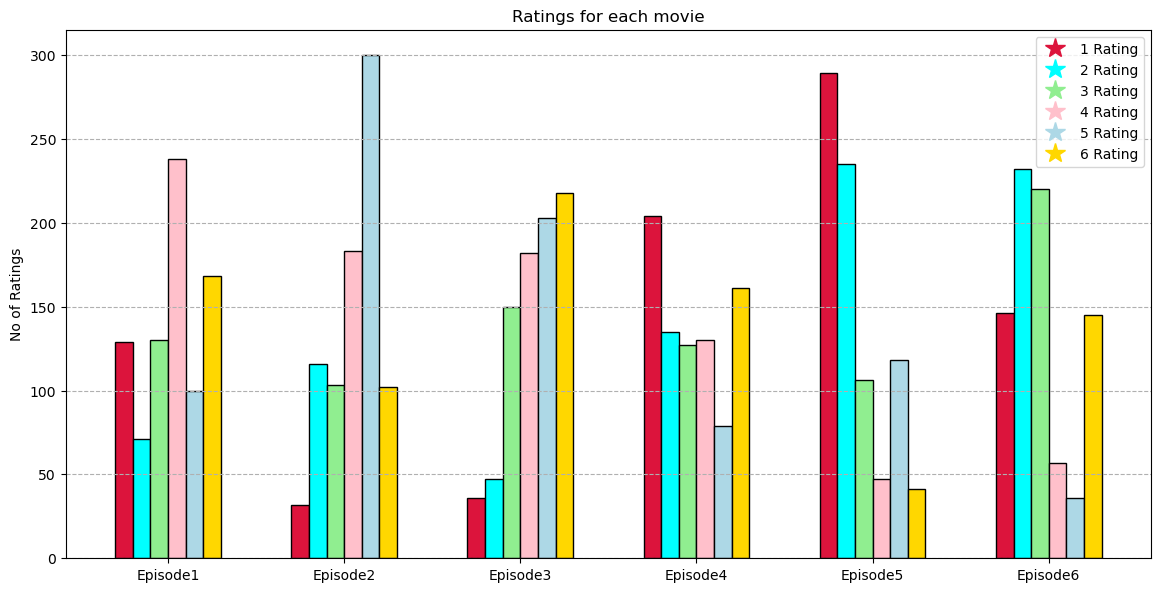

In [8]:
# ////// Task 2

# Reference: [6][12][13]
# //////2.1 Analysis of how people have ranked StarWars movies

# create dataframe to store movie rating counts group by movies
movie_rating_df = pd.DataFrame()
for single_movie in rank_cols:
    movie_rating_df[single_movie] = watched_movie_df.sort_values(single_movie)[single_movie].value_counts(sort=False)

x_labels = ['Episode1', 'Episode2', 'Episode3', 'Episode4', 'Episode5', 'Episode6']
legend_labels = ['1 Rating', '2 Rating', '3 Rating', '4 Rating', '5 Rating', '6 Rating']

# set the bar width
bar_width = 0.1
# list to store the x-axis location where the bars will be plotted (will increment by size of bar_width after every loop)
bar_idx = list(range(len(movie)))

# create axes object to plot the graph
fig, axes = plt.subplots(1, 1, figsize=(14, 7), dpi=100)

# loop through six movies and increment the bar index by bar width each time to plot grouped bar chart
for index in range(len(movie)):
    axes.bar( [idx + (index*bar_width) for idx in bar_idx], movie_rating_df.iloc[index], bar_width, 
             color = rating_colors[index], label = legend_labels[index], edgecolor = 'black')

# moving x ticks to the center of each bar plot
axes.set_xticks([idx + (2.5*bar_width) for idx in bar_idx])
axes.set_xticklabels(x_labels)

# setting y-axis label and title
axes.set_ylabel('No of Ratings')
axes.set_title('Ratings for each movie')

# create star shaped handles for the legend using Line2D
legend_marker = [Line2D([],[],marker='*', color=rating_colors[i], linestyle = 'None', markersize=15, 
                        label= legend_labels[i]) for i in range(len(rating_colors))]

plt.legend(handles = legend_marker, loc= 'upper right')
plt.grid(axis='y', linestyle='--')


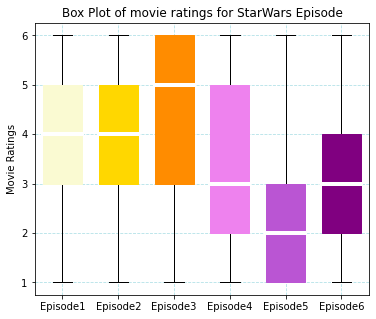

In [9]:
# Reference: [8]
# plot the box plot for movie ratings for each StarWars episode
fig,ax = plt.subplots(1,1,figsize=(6,5))

boxplt = ax.boxplot([watched_movie_df[rank_cols[i]] for i in range(len(rank_cols))], patch_artist=True, widths=0.7)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Movie Ratings')
ax.set_title('Box Plot of movie ratings for StarWars Episode')

# customize the box plot for every episode
for whisker, median, color in zip(boxplt['boxes'], boxplt['medians'], average_ratings_colors):
    whisker.set(color=color)
    median.set(color='white', linewidth=4)
    
plt.grid(linestyle='--', color='powderblue')
plt.show()


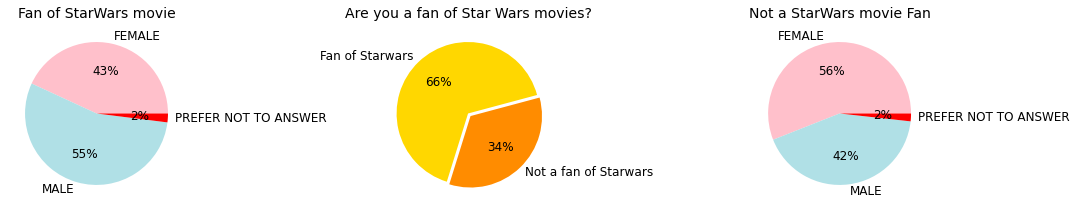

In [10]:
# Task 2.2: Relationships between columns

# Relation between 'Are you a fan of starwars movie?' and 'Gender' column

# create mask to filter the dataset based on is the person is a fan of Star Wars movie or not
is_a_fan = watched_movie_df['starwars_fan_col'] == 'YES'
is_not_a_fan = watched_movie_df['starwars_fan_col'] == 'NO'

# get the gender count
fan_gender_count = watched_movie_df[is_a_fan]['Gender'].value_counts(sort=False)
not_fan_gender_count = watched_movie_df[is_not_a_fan]['Gender'].value_counts(sort=False)

# plot 3 pie charts using the axes object
fig,axes = plt.subplots(1,3, figsize=(15,12))

axes[0].pie(fan_gender_count, labels = gender_category ,colors = gender_colors, autopct='%1.0f%%' , textprops= {'fontsize':12})
axes[0].set_title('Fan of StarWars movie', fontsize=14)

axes[1].pie([len(watched_movie_df[is_a_fan]), len(watched_movie_df[is_not_a_fan])], textprops= {'fontsize':12}, autopct='%1.0f%%', 
            labels=['Fan of Starwars', 'Not a fan of Starwars'], colors = ['gold','darkorange'], explode=(0,0.05), startangle=15)
axes[1].set_title("Are you a fan of Star Wars movies?", fontsize=14)

axes[2].pie(not_fan_gender_count, labels = gender_category,colors = gender_colors, autopct='%1.0f%%', textprops= {'fontsize':12})
axes[2].set_title('Not a StarWars movie Fan', fontsize=14)

plt.tight_layout()

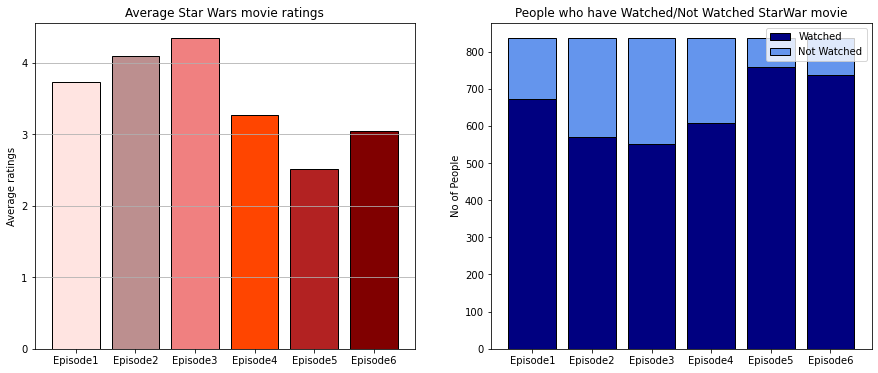

In [11]:
# Relationship between 'Rank the movies' column and 'Select all the movies that you have seen'

average_rating_array = np.array([])
watched_movie_count_arr = np.array([])
notwatched_movie_count_arr = np.array([])

# store average rating counts, no of people who have watched/not watched movie counts in separate arrays to plot the data
for movie_rank_col, single_movie in zip(rank_cols, movie):
    average_rating_array = np.append(average_rating_array,watched_movie_df[movie_rank_col].mean())
    watch_count = max(watched_movie_df[single_movie].value_counts())
    watched_movie_count_arr = np.append(watched_movie_count_arr, watch_count)
    notwatched_movie_count_arr = np.append(notwatched_movie_count_arr, len(watched_movie_df) - watch_count)

# create axes object to plot two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# bar chart to plot average movie ratings
axes[0].bar(x_labels, pd.Series(average_rating_array),label= [movie[i] for i in range(len(movie))], 
            color=red_patch_colors, edgecolor='black')
axes[0].set_title("Average Star Wars movie ratings")
axes[0].set_ylabel("Average ratings")
axes[0].grid(axis='y')

# Reference: [9]
# stacked bar chart for people who have WATCHED/NOT WATCHED movie
axes[1].bar(x_labels, pd.Series(watched_movie_count_arr),label= 'Watched', color='navy', edgecolor='black')
axes[1].bar(x_labels, pd.Series(notwatched_movie_count_arr),label= 'Not Watched', bottom=watched_movie_count_arr,
            color='cornflowerblue', edgecolor='black')
axes[1].set_title("People who have Watched/Not Watched StarWar movie")
axes[1].set_ylabel("No of People")

plt.legend()
plt.show()


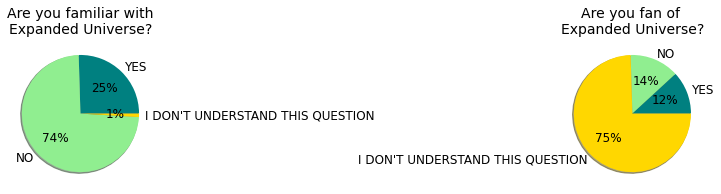

In [12]:
# Relationship between 'Are you familiar with Expanded Universe?' and 'Are you a fan of Expanded Universe?'

# create axes object to plot two subplots
fig,axes = plt.subplots(1,2, figsize=(10,6))

axes[0].pie(watched_movie_df['familiar_exp_universe_col'].value_counts(sort=False), labels=yes_no_category ,
            colors = yes_no_colors, autopct='%1.0f%%',textprops={'fontsize': 12}, shadow = True)
axes[0].set_title('Are you familiar with\nExpanded Universe?', fontsize=14)

axes[1].pie(watched_movie_df['fan_of_exp_universe_col'].value_counts(sort=False), labels=yes_no_category ,
            colors = yes_no_colors, autopct='%1.0f%%',textprops={'fontsize': 12}, shadow = True)
axes[1].set_title('Are you fan of \nExpanded Universe?', fontsize=14)

plt.tight_layout()


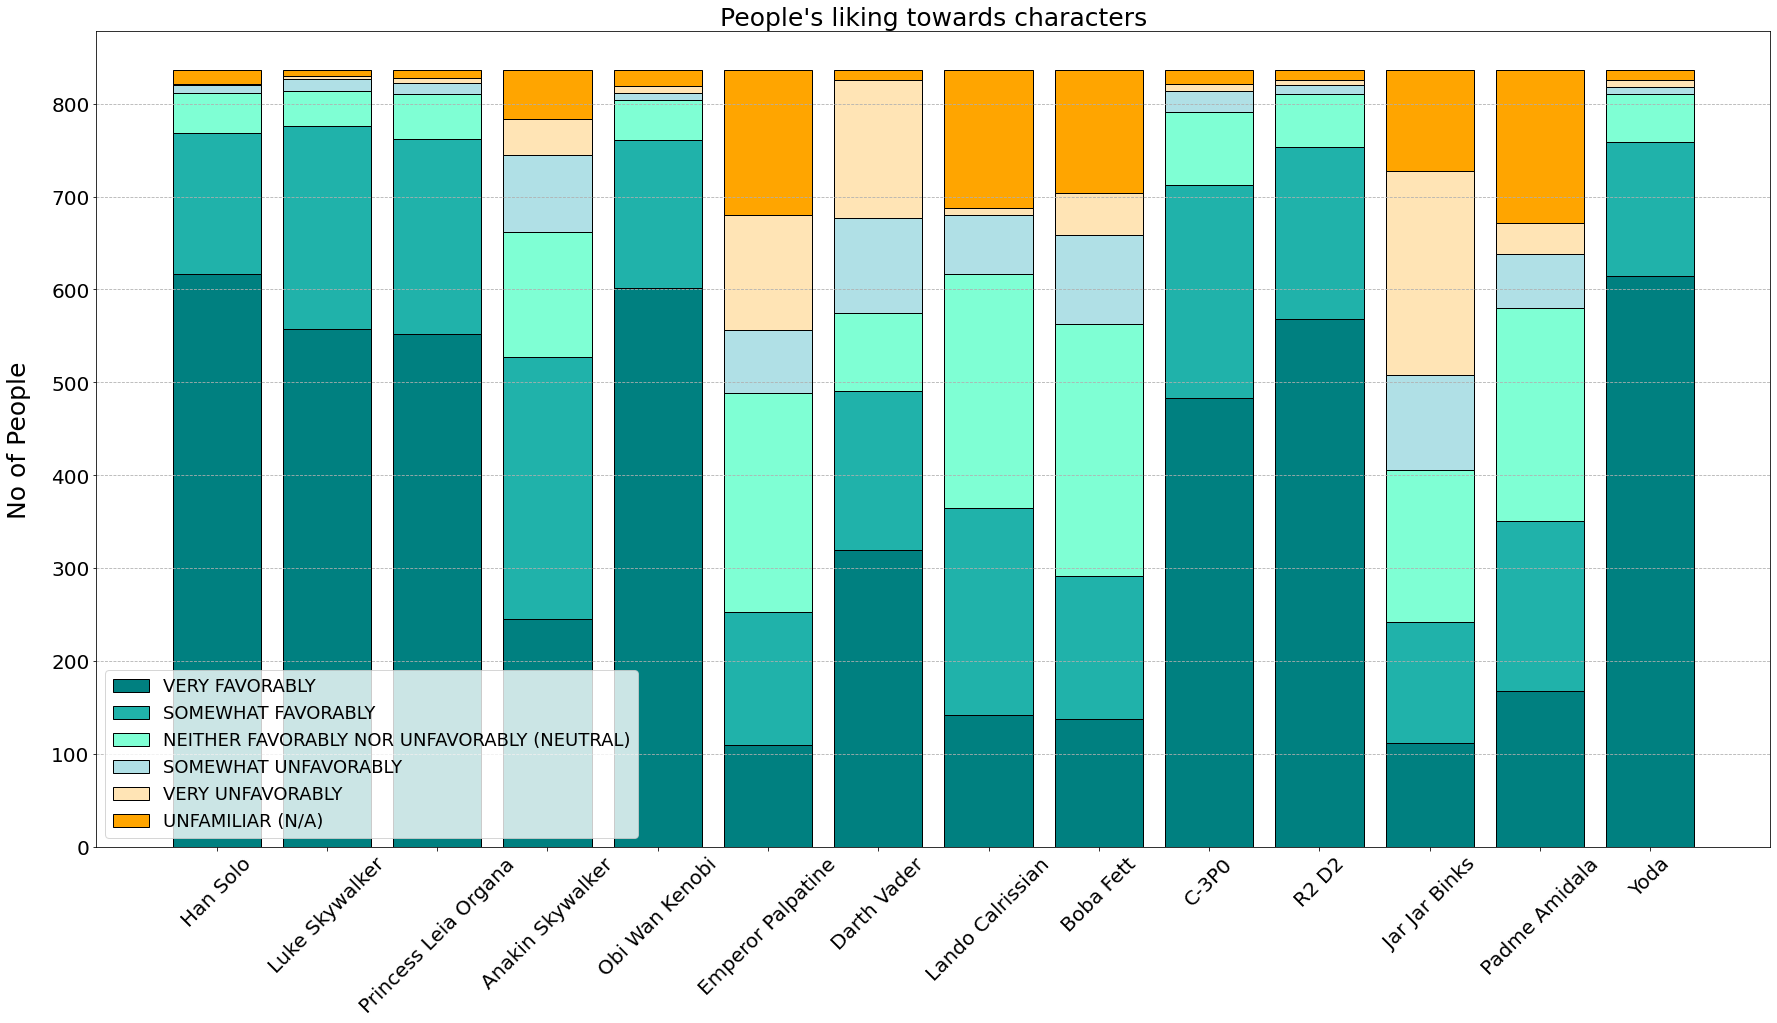

In [13]:
# Task 2.3

# create dataframe to store character category counts grouped by each character
character_rating_count_df = pd.DataFrame()
for character in characters:
    character_rating_count_df[character] = watched_movie_df[character].value_counts(sort=False)

fig,ax = plt.subplots(1,1, figsize=(30,15))

# create stacked bar plot for every character category
bottom0 = character_rating_count_df.iloc[0]
ax.bar(characters, bottom0, label= characters_category[0], color= stacked_character_colors[0], edgecolor='black')
bottom1 = character_rating_count_df.iloc[1]
ax.bar(characters, bottom1, label= characters_category[1], bottom = bottom0, color=stacked_character_colors[1], edgecolor='black')
bottom2 = character_rating_count_df.iloc[2]
ax.bar(characters, bottom2, label= characters_category[2], bottom = [i+j for i,j in zip(bottom0, bottom1)], color=stacked_character_colors[2], edgecolor='black')
bottom3 = character_rating_count_df.iloc[3]
ax.bar(characters, bottom3, label= characters_category[3], bottom = [i+j+k for i,j,k in zip(bottom0, bottom1, bottom2)], color=stacked_character_colors[3], edgecolor='black')
bottom4 = character_rating_count_df.iloc[4]
ax.bar(characters, bottom4, label= characters_category[4], bottom = [i+j+k+l for i,j,k,l in zip(bottom0, bottom1, bottom2, bottom3)], color=stacked_character_colors[4], edgecolor='black')
bottom5 = character_rating_count_df.iloc[5]
ax.bar(characters, bottom5, label= characters_category[5], bottom = [i+j+k+l+m for i,j,k,l,m in zip(bottom0, bottom1, bottom2, bottom3, bottom4)], color=stacked_character_colors[5], edgecolor='black')

# set the x-y axis labels and fontsize
ax.set_ylabel("No of People", fontsize=25, labelpad=20)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='both', labelsize=20)
ax.set_title("People's liking towards characters", fontsize=25)

# set the legend and plot the graph
plt.legend(loc='lower left', prop= {'size':18})
plt.grid(axis='y', linestyle = '--')

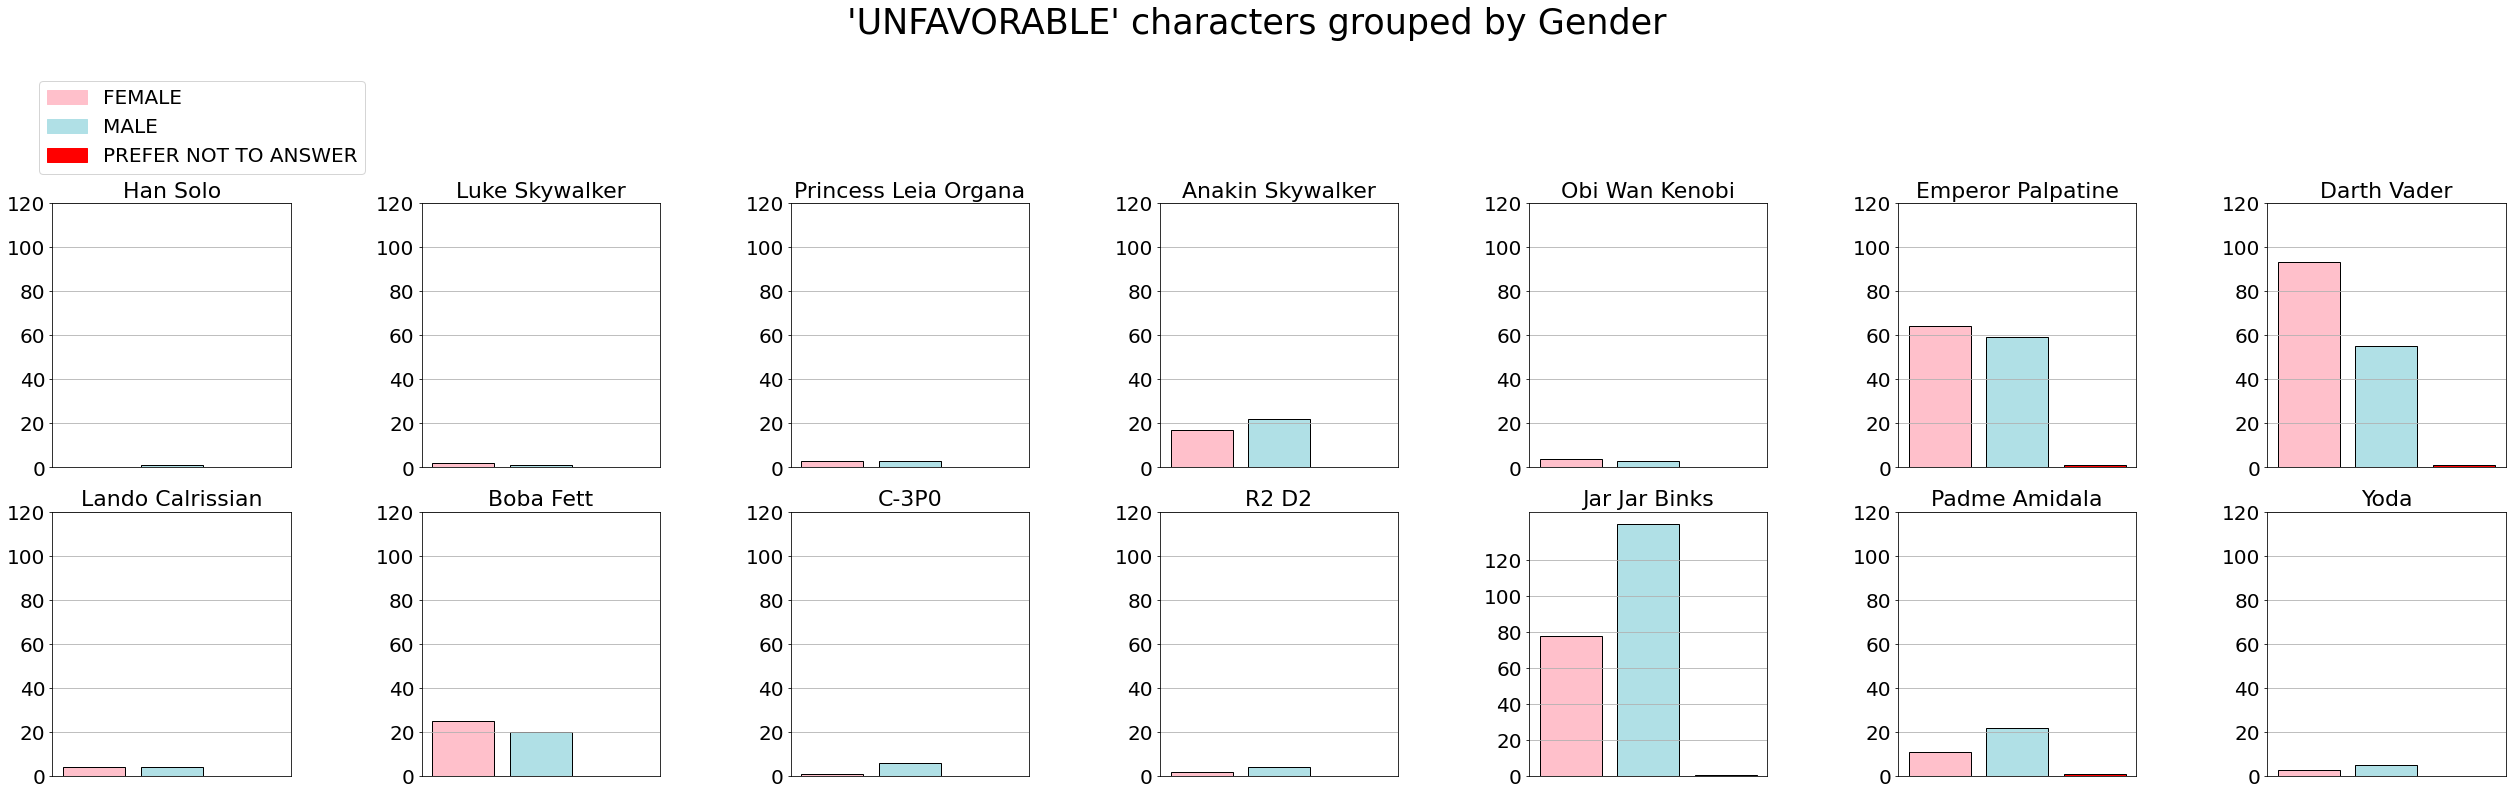

In [14]:
# Reshape the characters array into a 2-D array to create subplots in that fashion
character_arr = np.reshape(characters, (2,7))

# Relationship with attribute 'Gender'

# create bar plots for all the 14 characters which are 'Unfavorable' grouped by 'Gender'
fig, ax = plt.subplots(2,7,figsize=(35,10))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        m_f_count = watched_movie_df[(watched_movie_df[character] == characters_category[4])]['Gender'].value_counts(sort=False)
        ax[i][j].bar(gender_category, m_f_count, color=gender_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,140,20))
        ax[i][j].tick_params(axis='y', labelsize=20)
        ax[i][j].tick_params(axis='x', bottom=False, labelbottom=False)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22)

# Reference: [11]
# add custom legend for the bar plots
handles = [mpatches.Patch(color=gender_colors[i], label=gender_category[i]) for i in range(len(gender_category))]
ax[0][0].legend(handles=handles, loc='upper left', bbox_to_anchor=(-0.1, 1.5), fontsize=20)

fig.suptitle("'UNFAVORABLE' characters grouped by Gender", fontsize = 35, y = 1.1)
plt.tight_layout()

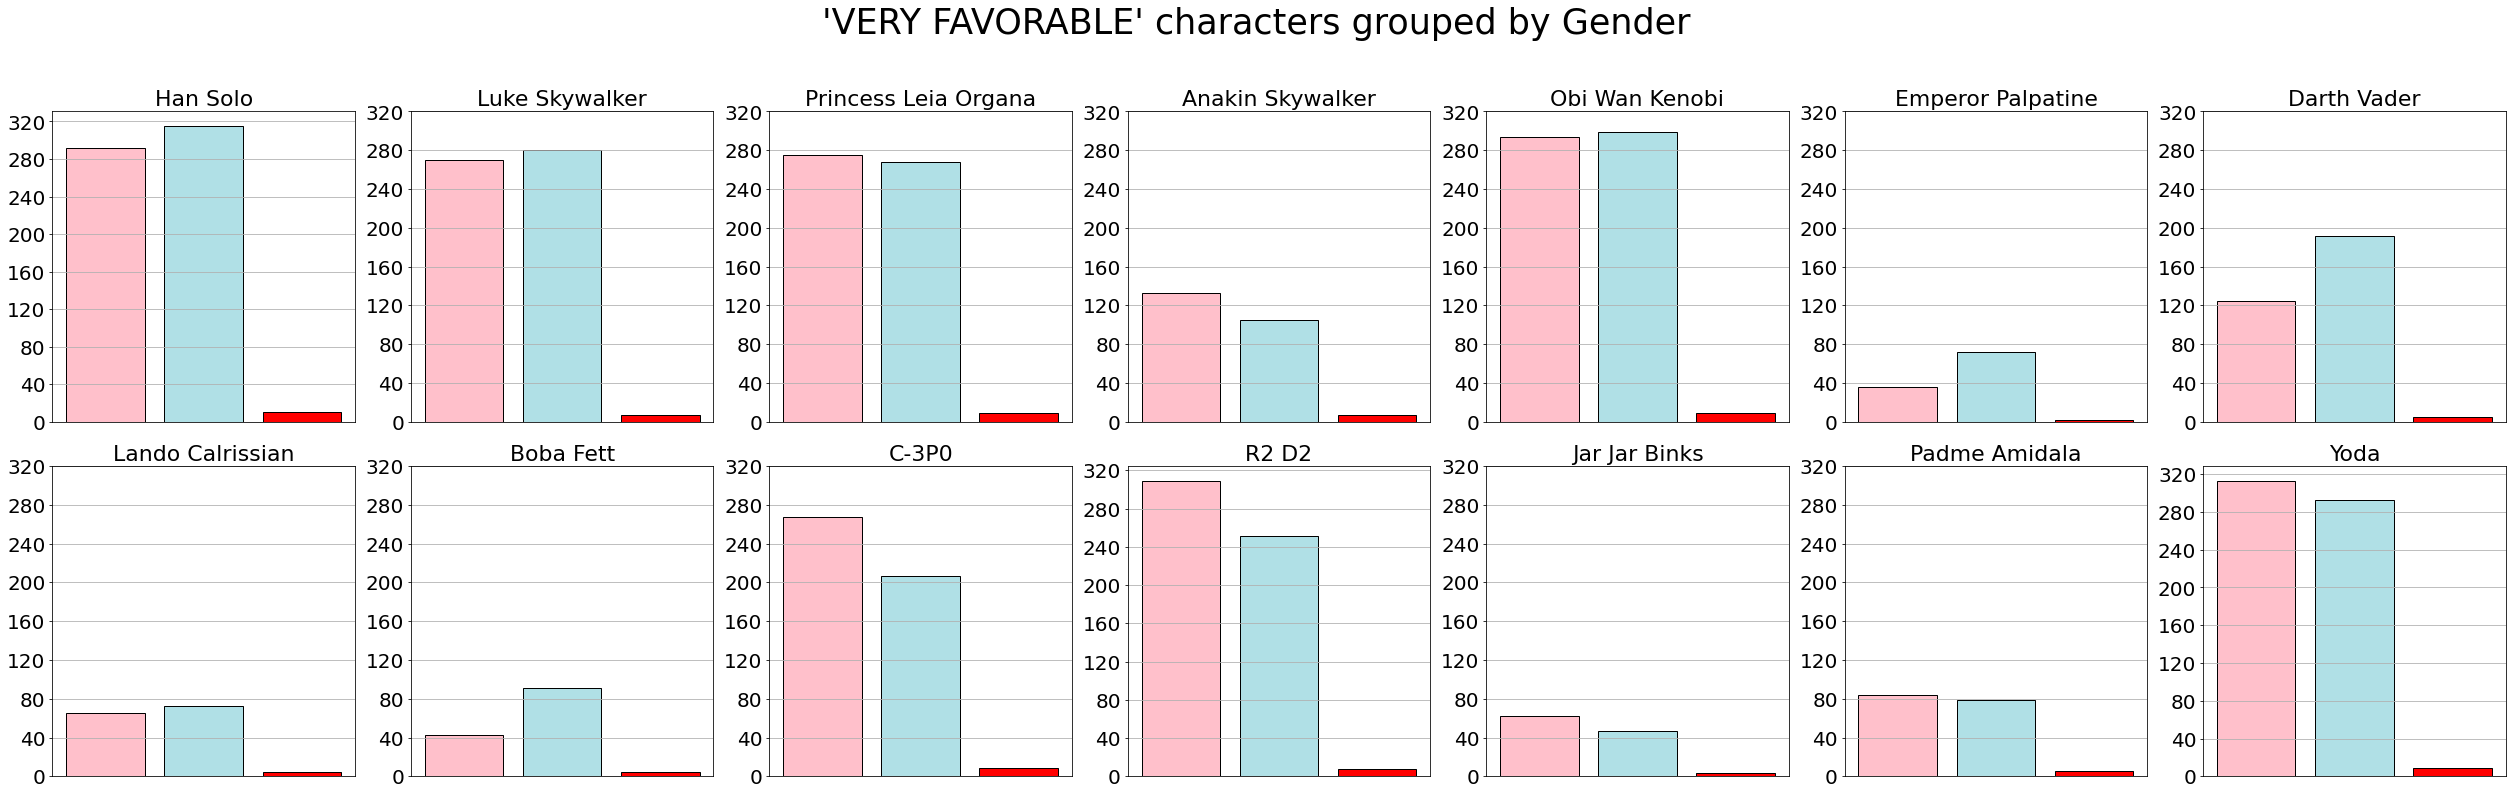

In [15]:
# create bar plots for all the 14 characters which are 'Very favorable' grouped by 'Gender'
fig, ax = plt.subplots(2,7,figsize=(35,10))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        m_f_count = watched_movie_df[(watched_movie_df[character] == characters_category[0])]['Gender'].value_counts(sort=False)
        ax[i][j].bar(gender_category, m_f_count, color=gender_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,330,40))
        ax[i][j].tick_params(axis='y', labelsize=20)
        ax[i][j].tick_params(axis='x', bottom=False, labelbottom=False)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22)
        
fig.suptitle("'VERY FAVORABLE' characters grouped by Gender", fontsize = 35, y = 1.1)
plt.tight_layout()

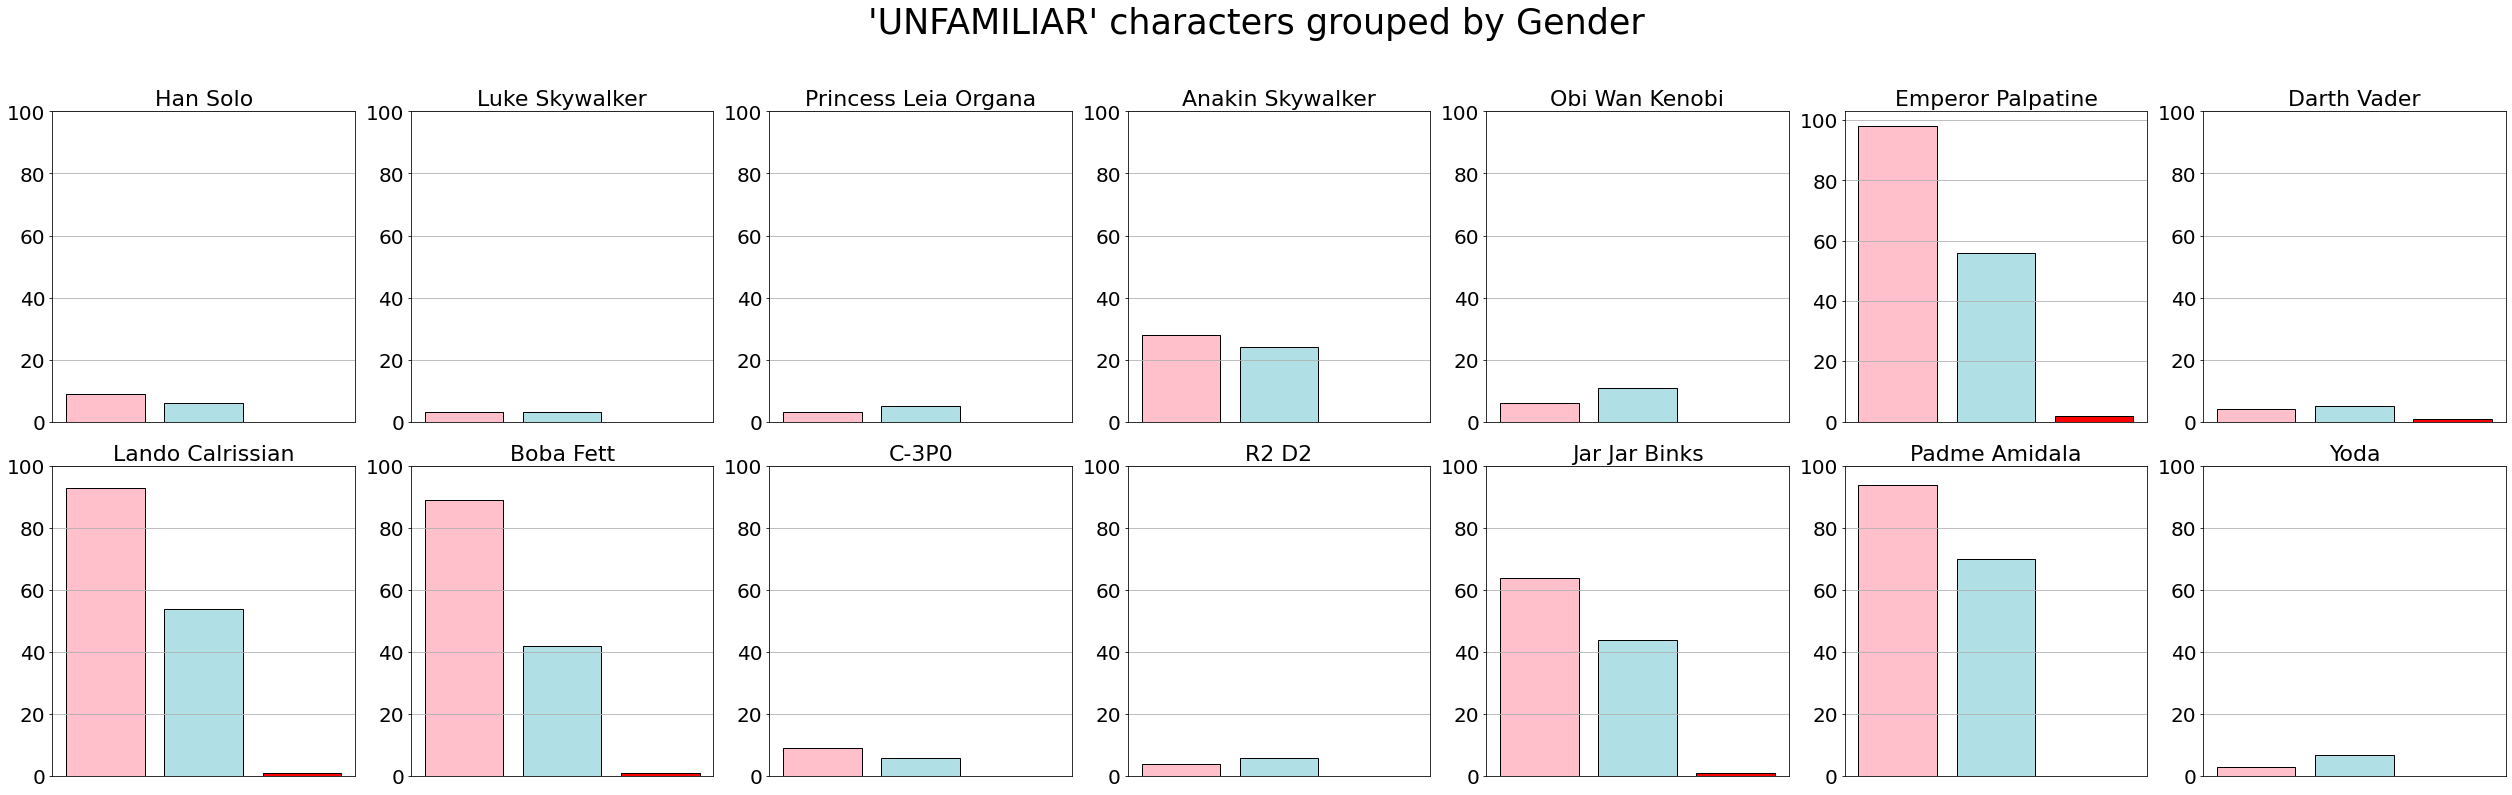

In [16]:
# create bar plots for all the 14 characters which are 'Unfamiliar' grouped by 'Gender'
fig, ax = plt.subplots(2,7,figsize=(35,10))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        m_f_count = watched_movie_df[(watched_movie_df[character] == characters_category[5])]['Gender'].value_counts(sort=False)
        ax[i][j].bar(gender_category, m_f_count, color=gender_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,110,20))
        ax[i][j].tick_params(axis='y', labelsize=20)
        ax[i][j].tick_params(axis='x', bottom=False, labelbottom=False)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22)
        
fig.suptitle("'UNFAMILIAR' characters grouped by Gender", fontsize = 35, y = 1.1)
plt.tight_layout()

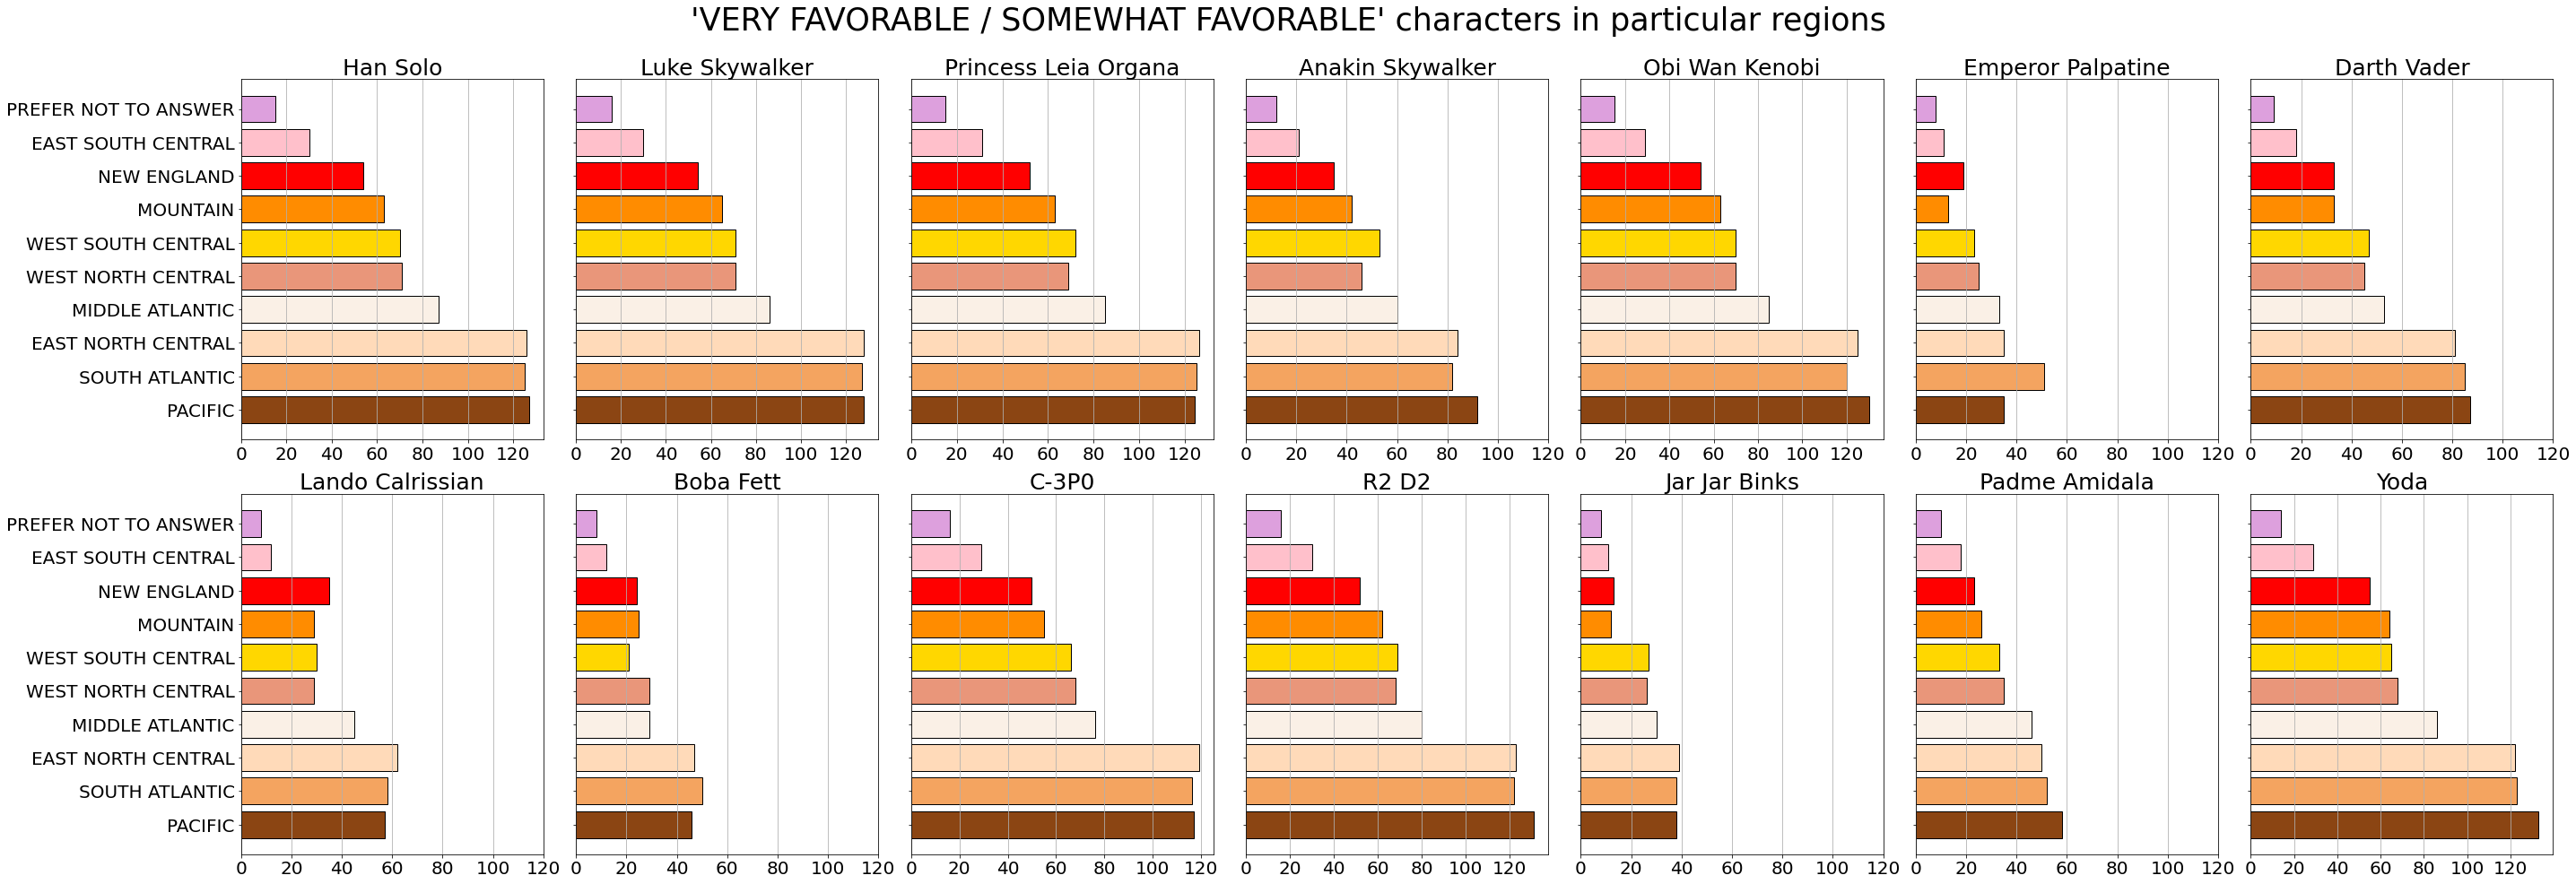

In [17]:
# Relationship with attribute 'Location'

# Reference: [7]
# create bar plots for all the 14 characters across all the locations who are 'Very favorable/ Somewhat favorable'
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        data = watched_movie_df[(watched_movie_df[character] == characters_category[0]) | 
                                (watched_movie_df[character] == characters_category[1])]['Location'].value_counts(sort=False)
        ax[i][j].barh(location_category, data, label= [location_category[j] for j in range(len(location_category))], 
                      color=location_colors, edgecolor='black')
        ax[i][j].grid(axis='x')
        ax[i][j].set_xticks(range(0,140,20))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_title(character, fontsize = 25, pad=0.2)
        
fig.suptitle("'VERY FAVORABLE / SOMEWHAT FAVORABLE' characters in particular regions", fontsize = 35, y=1.05)
plt.tight_layout()

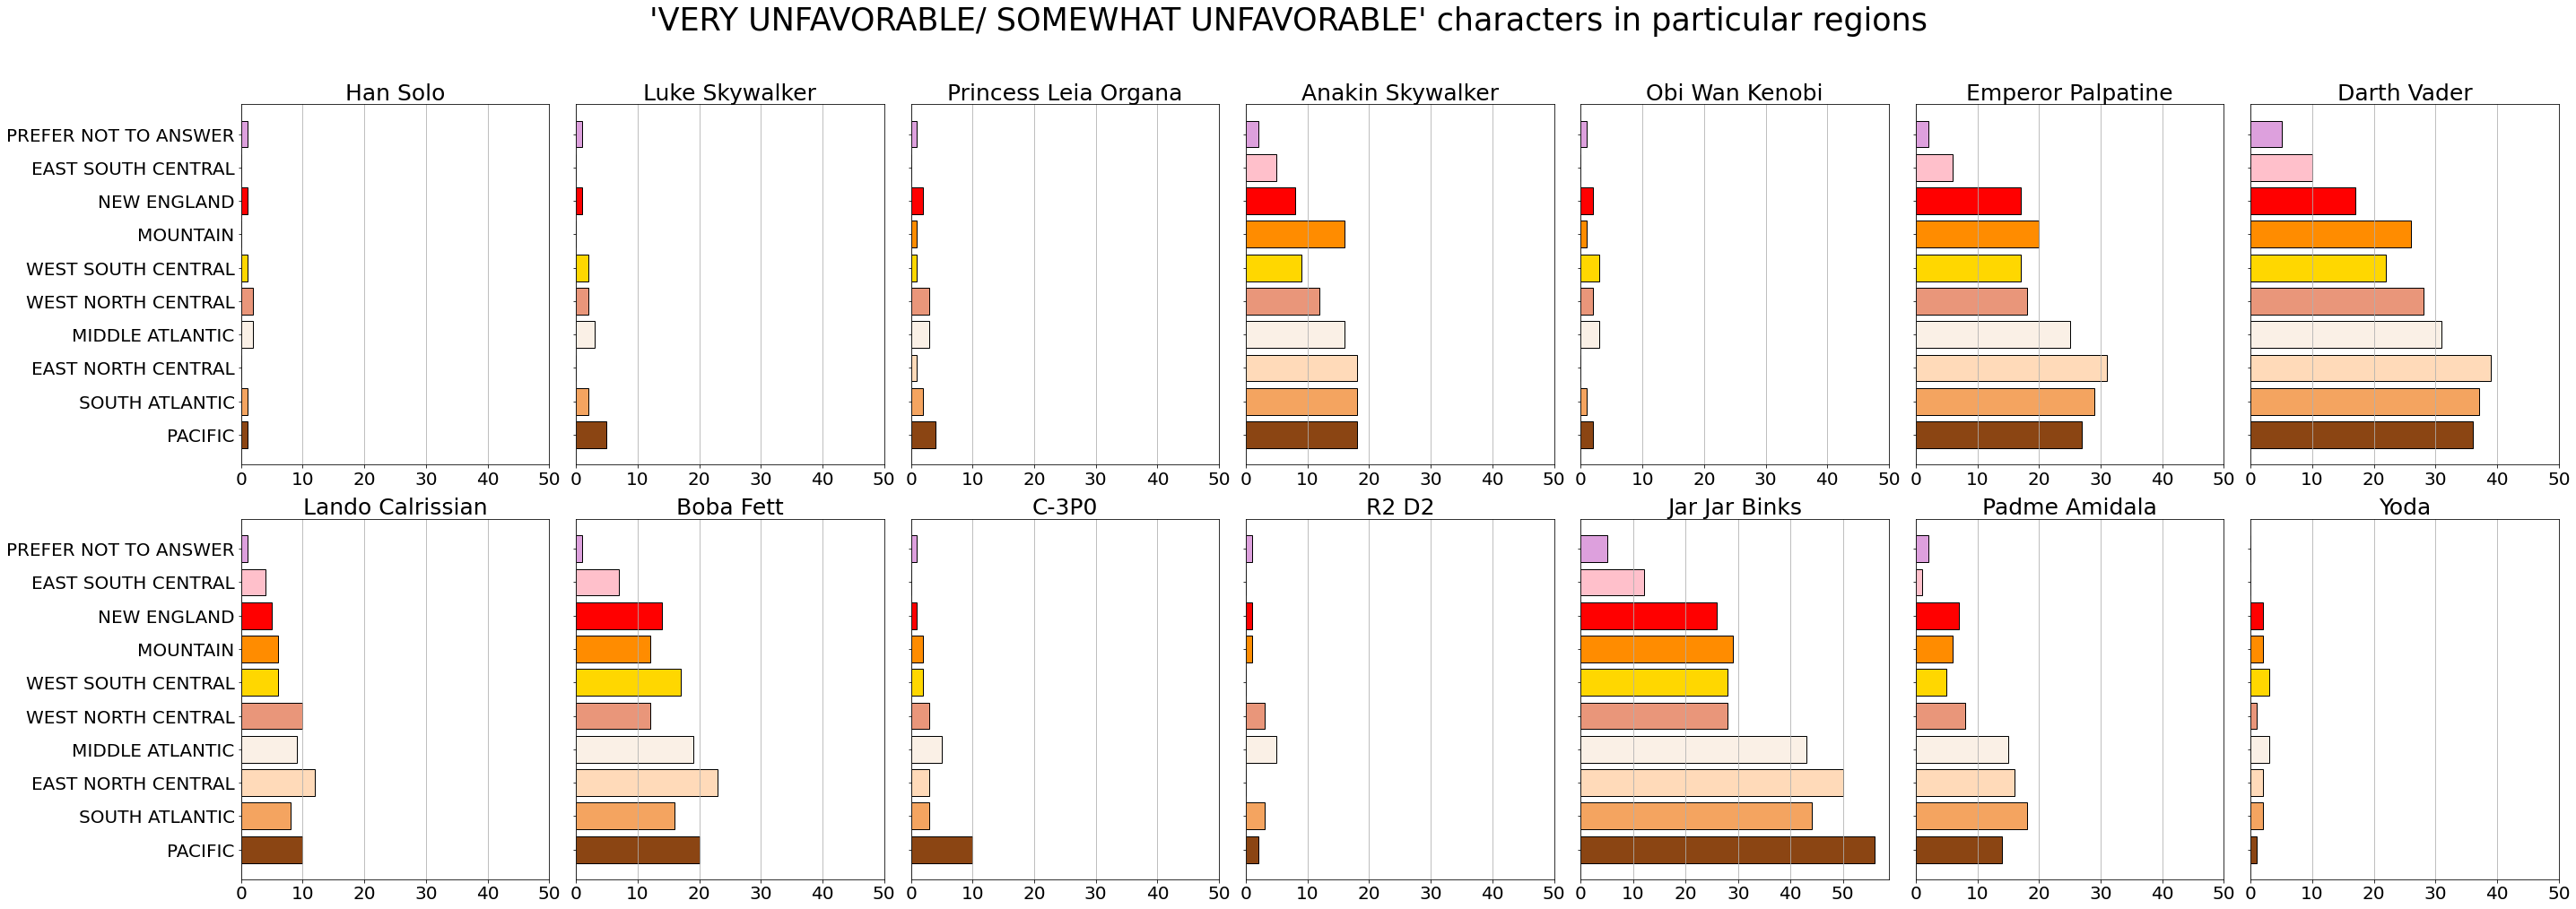

In [18]:
# create bar plots for all the 14 characters across all the locations who are 'Very Unfavorable/ Somewhat Unfavorable'
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        data = watched_movie_df[(watched_movie_df[character] == characters_category[3]) | 
                               (watched_movie_df[character] == characters_category[4])]['Location'].value_counts(sort=False)
        ax[i][j].barh(location_category, data, label= [location_category[j] for j in range(len(location_category))], 
                      color=location_colors, edgecolor='black')
        ax[i][j].grid(axis='x')
        ax[i][j].set_xticks(range(0,60,10))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_title(character, fontsize = 25, pad=0.2)
        
fig.suptitle("'VERY UNFAVORABLE/ SOMEWHAT UNFAVORABLE' characters in particular regions", fontsize = 35, y=1.08)
plt.tight_layout()

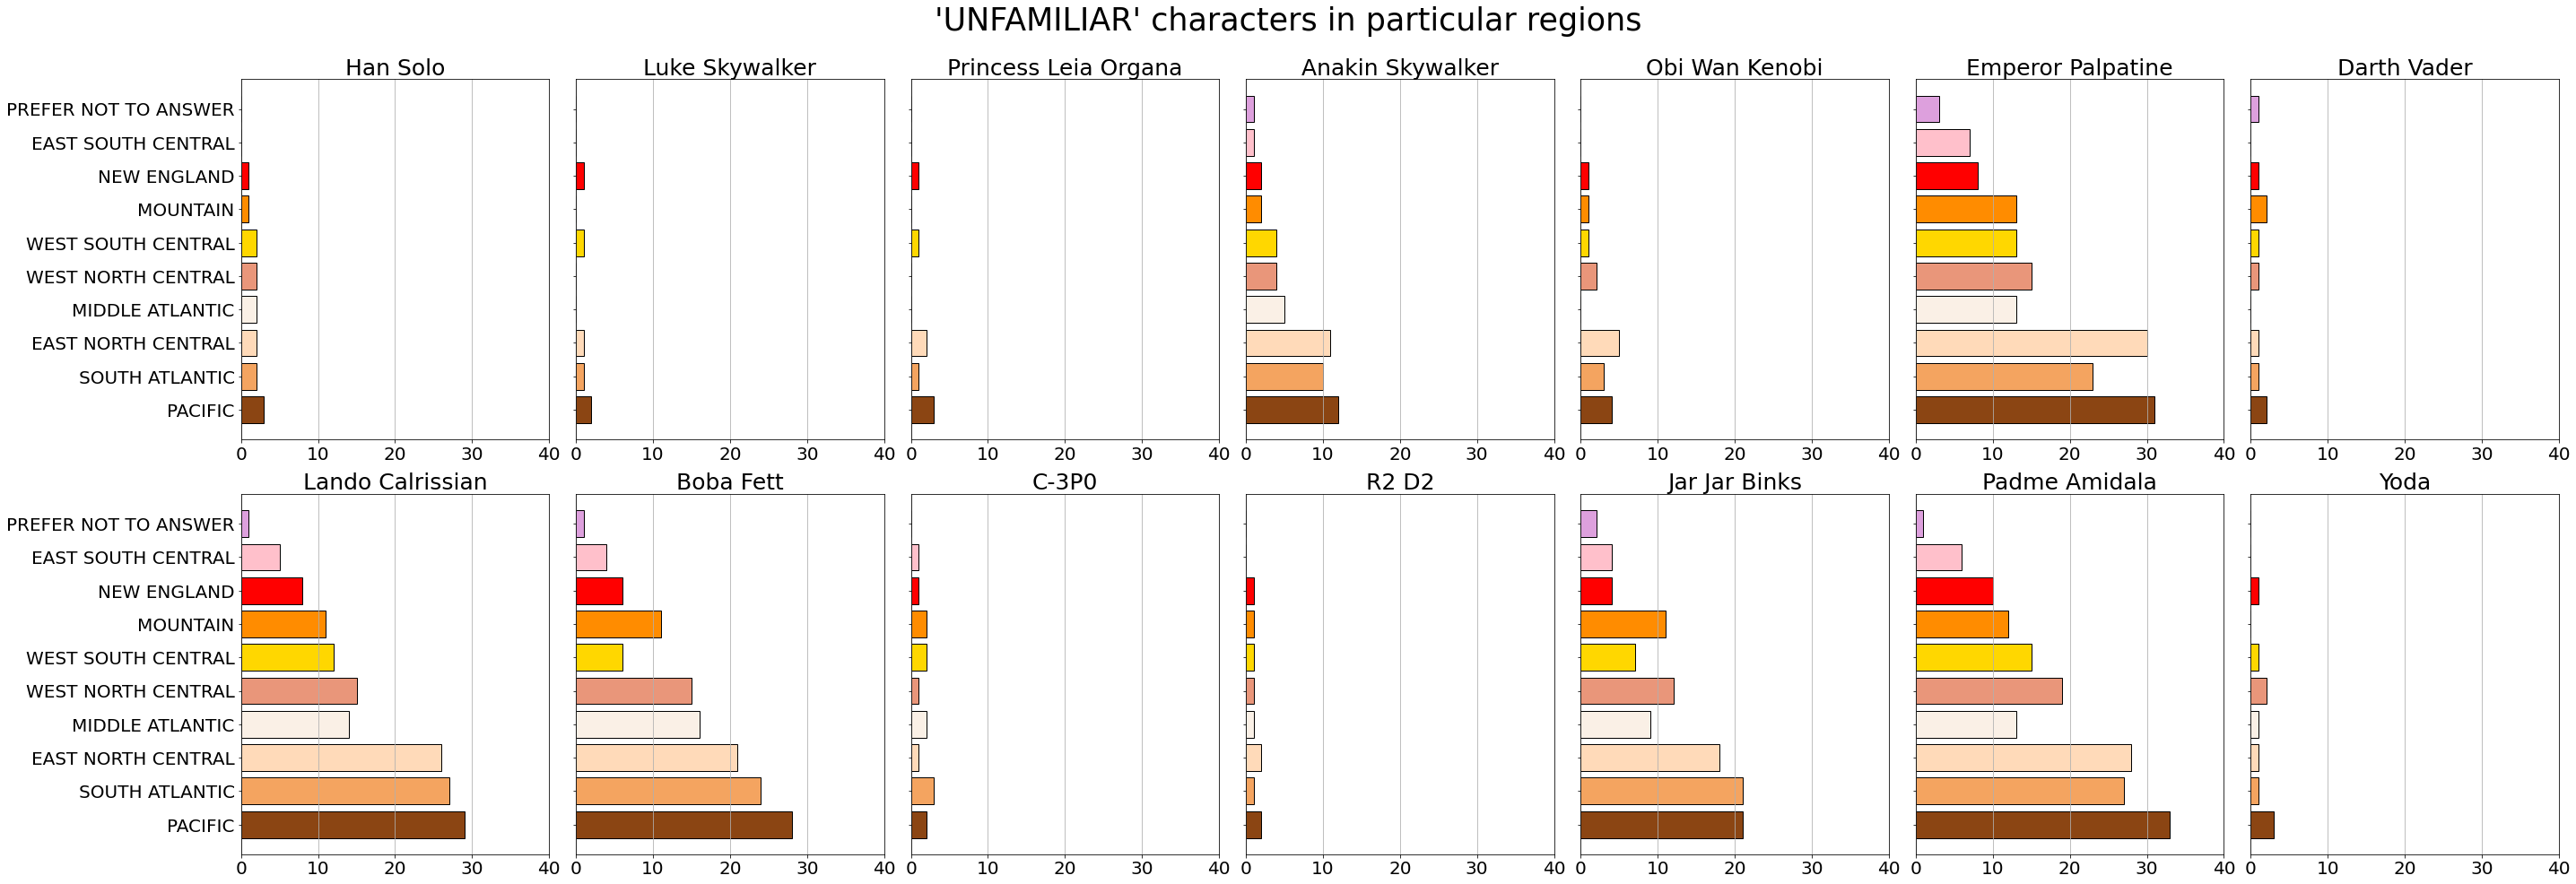

In [19]:
# create bar plots for all the 14 characters across all the locations who are 'Unfamiliar'
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        data = watched_movie_df[(watched_movie_df[character] == characters_category[5]) ]['Location'].value_counts(sort=False)
        ax[i][j].barh(location_category, data, label= [location_category[j] for j in range(len(location_category))], 
                      color=location_colors, edgecolor='black')
        ax[i][j].grid(axis='x')
        ax[i][j].set_xticks(range(0,50,10))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_title(character, fontsize = 25, pad=0.2)
        
fig.suptitle("'UNFAMILIAR' characters in particular regions", fontsize = 35, y=1.05)
plt.tight_layout()

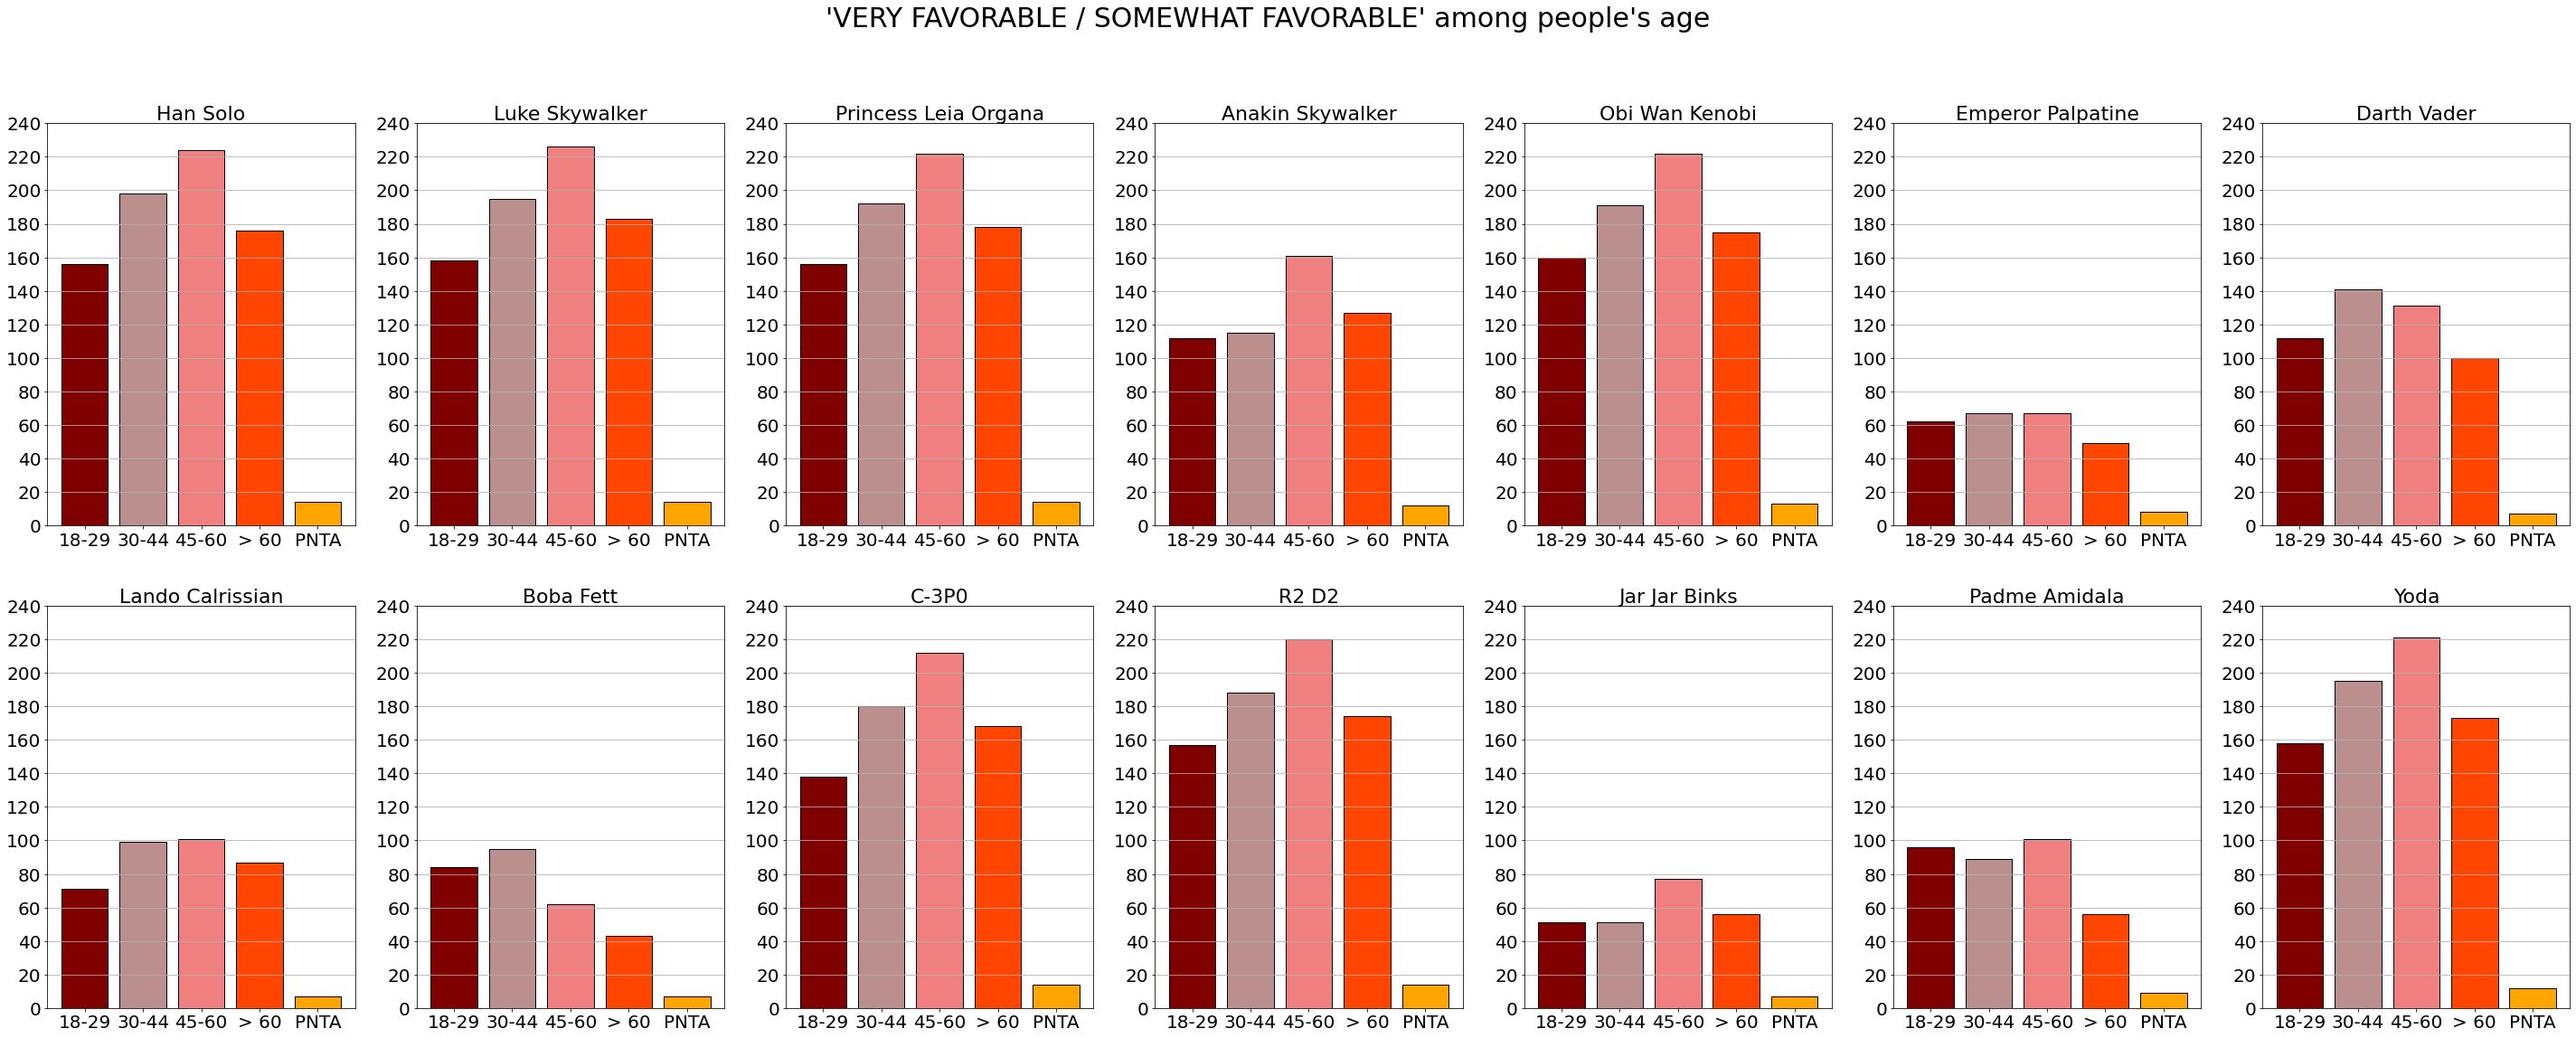

In [20]:
# Relationship with attribute 'Age'

# replace 'PREFER NOT TO ANSWER' with 'PNTA' to properly display x ticks on plots 
age_category = ['18-29','30-44', '45-60', '> 60', 'PNTA']

# create bar plots for all the 14 characters which are 'Very favorable/ Somewhat favorable' across the age groups 
fig, ax = plt.subplots(2,7,figsize=(50,18))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        age_count = watched_movie_df[(watched_movie_df[character] == characters_category[0]) | 
                                     (watched_movie_df[character] == characters_category[1])]['Age'].value_counts(sort=False)
        ax[i][j].bar(age_category, age_count, color=age_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,260,20))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'VERY FAVORABLE / SOMEWHAT FAVORABLE' among people's age", fontsize = 30)
plt.show()

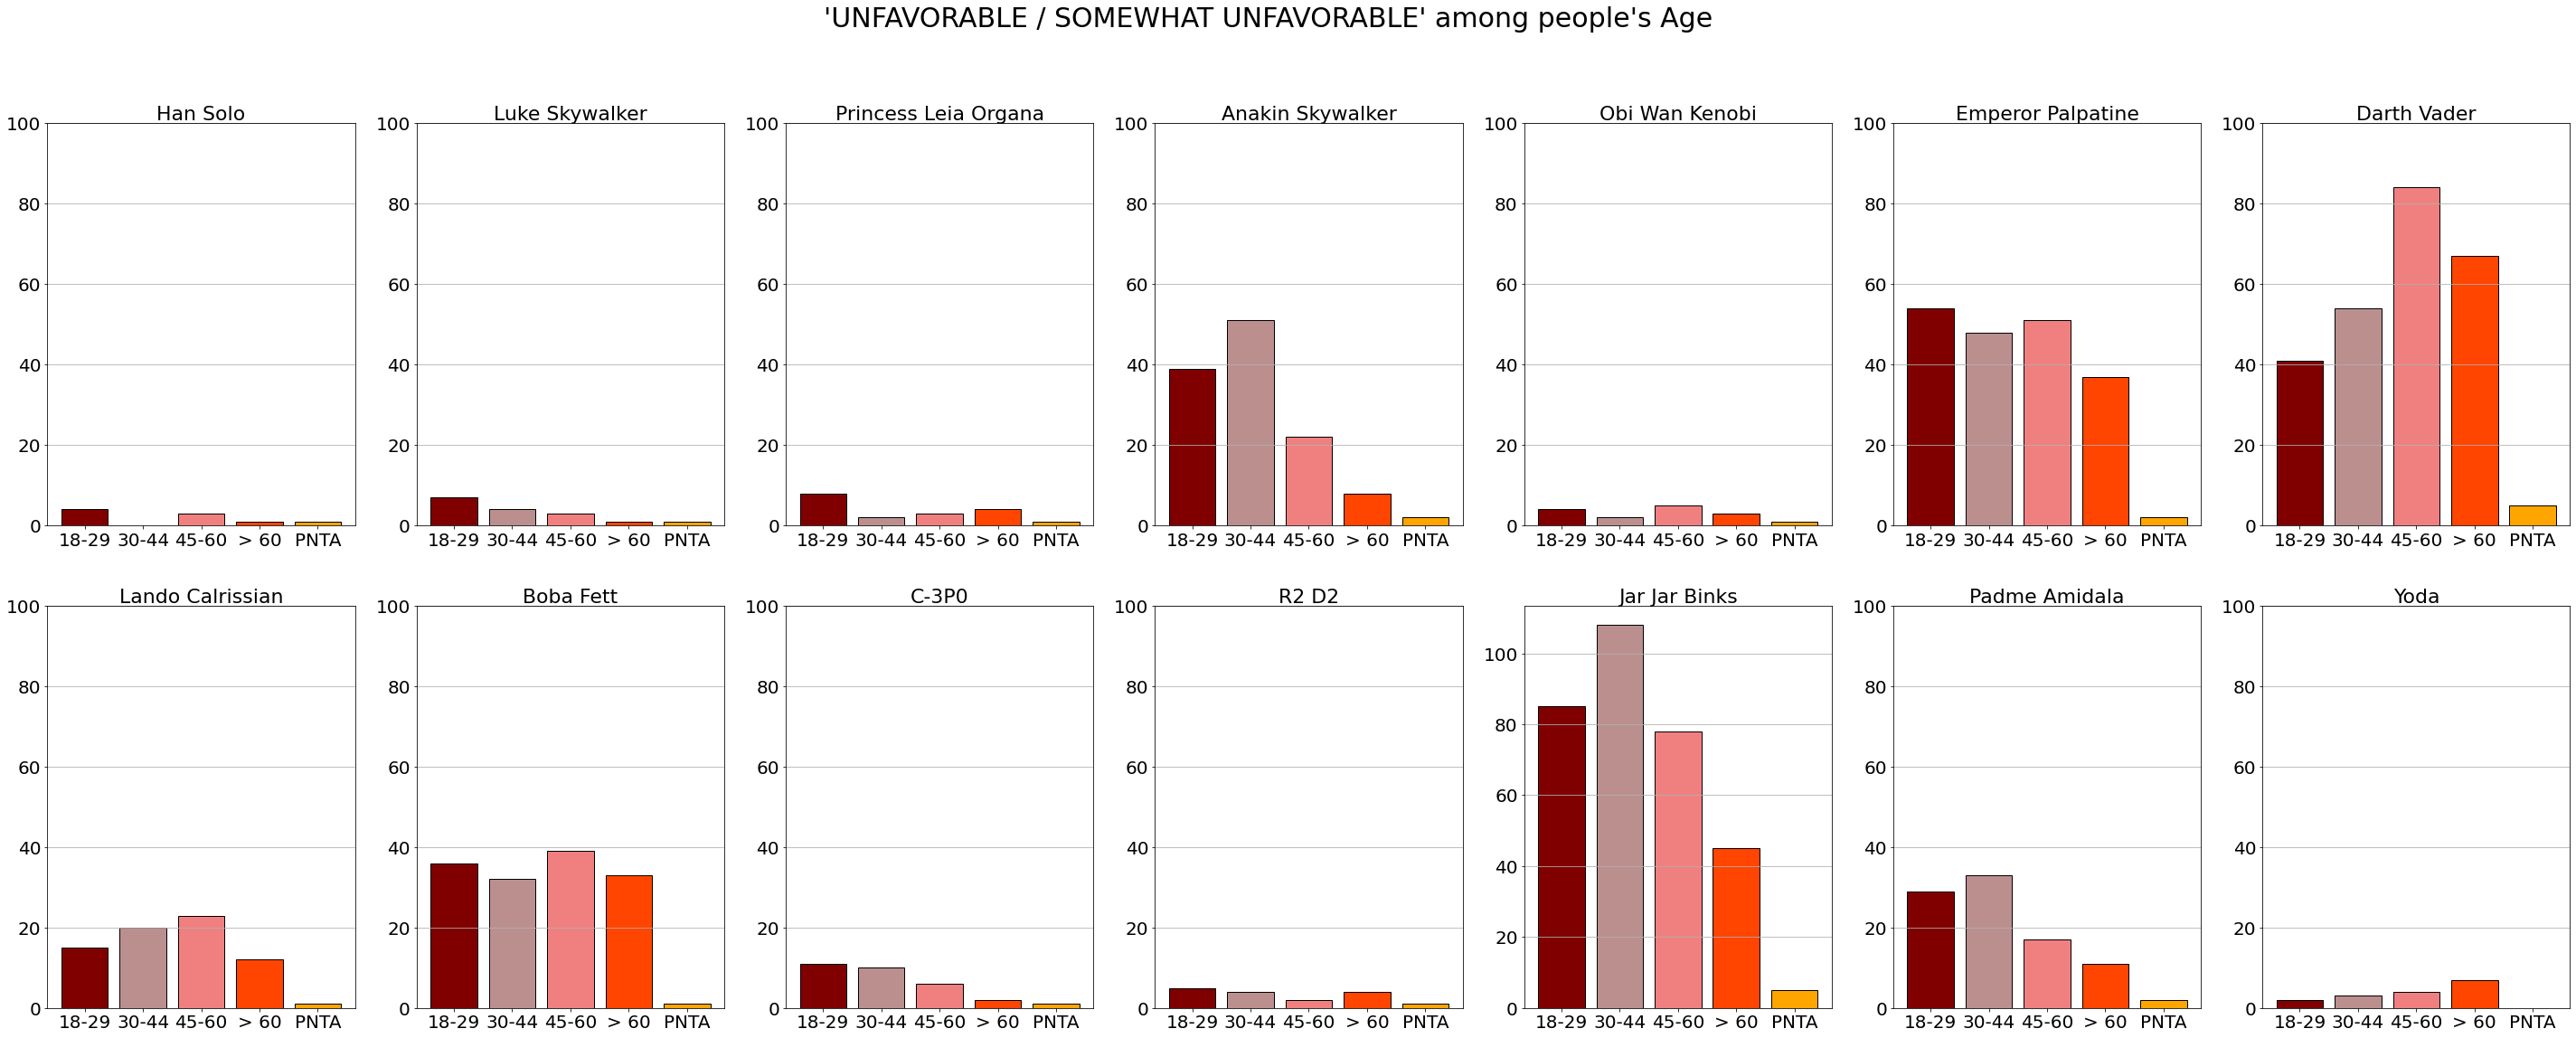

In [21]:
# create bar plots for all the 14 characters which are 'Very Unfavorable/ Somewhat Unfavorable' across the age groups 
fig, ax = plt.subplots(2,7,figsize=(50,18))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        age_count = watched_movie_df[(watched_movie_df[character] == characters_category[3]) | 
                                     (watched_movie_df[character] == characters_category[4]) ]['Age'].value_counts(sort=False)
        ax[i][j].bar(age_category, age_count, color=age_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,110,20))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'UNFAVORABLE / SOMEWHAT UNFAVORABLE' among people's Age", fontsize = 30)
plt.show()

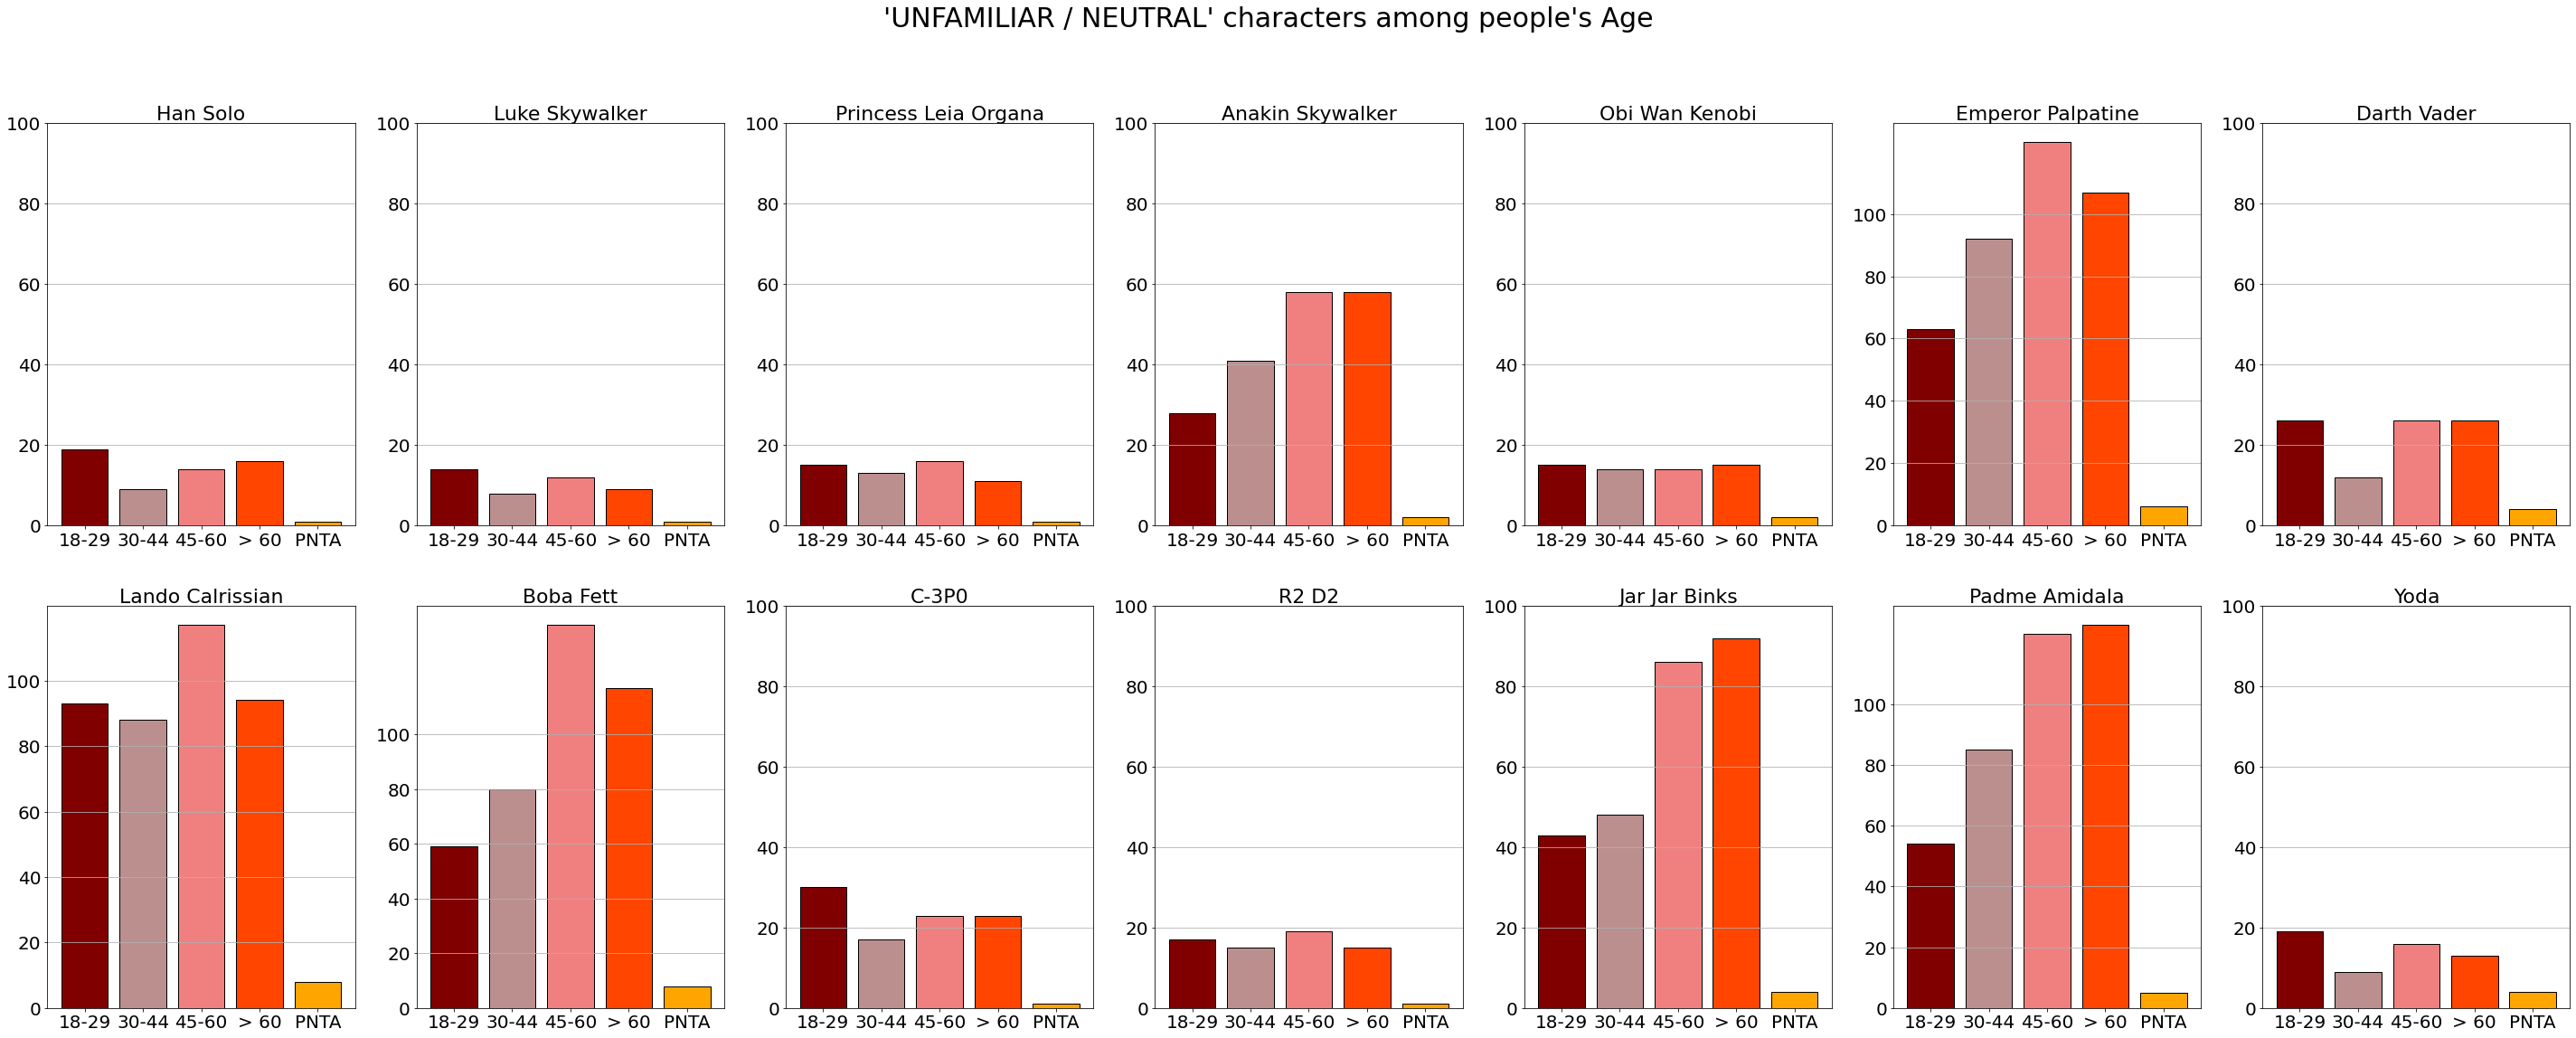

In [22]:
# create bar plots for all the 14 characters which are 'Unfamiliar/Neutral' across the age groups
fig, ax = plt.subplots(2,7,figsize=(50,18))

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        age_count = watched_movie_df[(watched_movie_df[character] == characters_category[2]) | 
                                     (watched_movie_df[character] == characters_category[5]) ]['Age'].value_counts(sort=False)
        ax[i][j].bar(age_category, age_count, color=age_colors, edgecolor='black')
        ax[i][j].set_yticks(range(0,110,20))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='y')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'UNFAMILIAR / NEUTRAL' characters among people's Age", fontsize = 30)
plt.show()

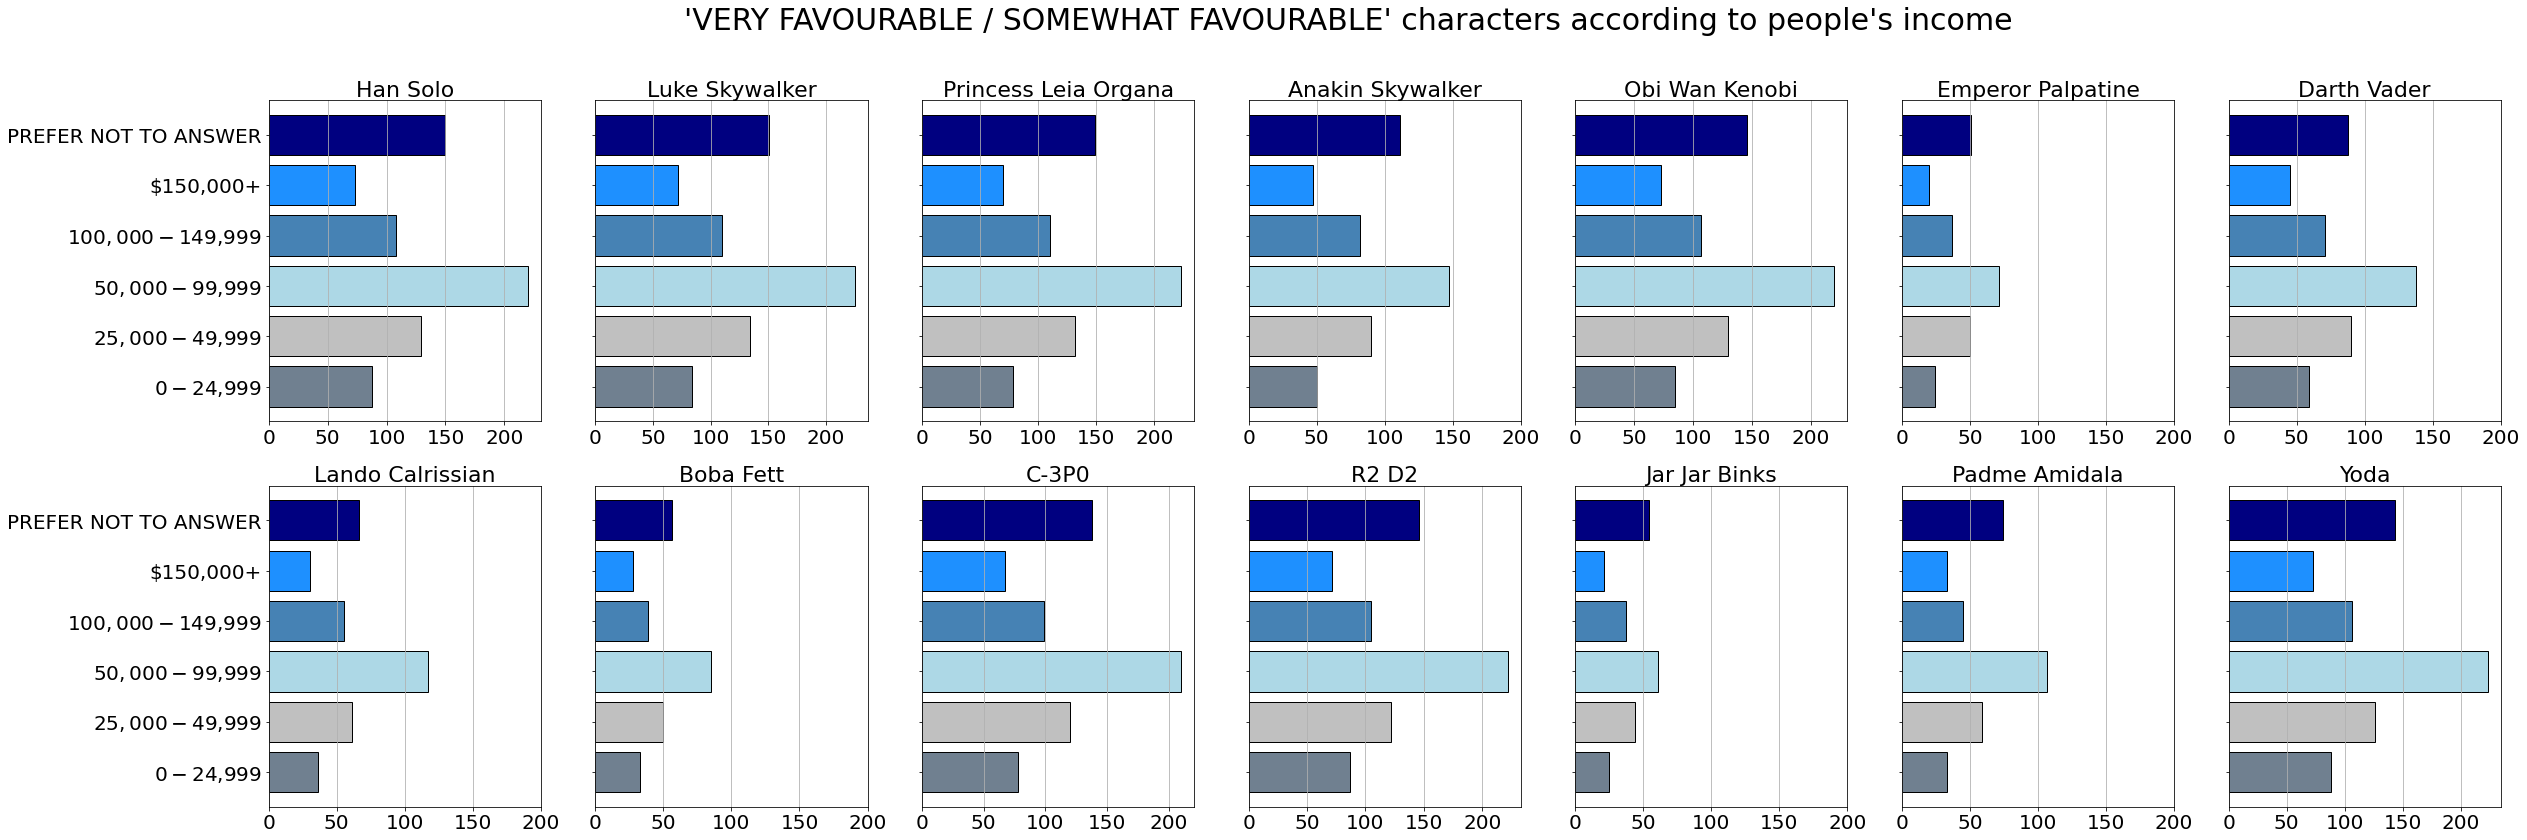

In [23]:
# Relationship with attribute 'Household Income'

# create bar plots for all the 14 characters which are 'Very favorable/ Somewhat favorable' for different income groups 
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        income_count = watched_movie_df[(watched_movie_df[character] == characters_category[0]) | 
                        (watched_movie_df[character] == characters_category[1])]['Household Income'].value_counts(sort=False)
        ax[i][j].barh(income_category, income_count, color=income_colors, edgecolor='black')
        ax[i][j].set_xticks(range(0,250,50))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='x')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'VERY FAVOURABLE / SOMEWHAT FAVOURABLE' characters according to people's income", fontsize = 30)
plt.show()

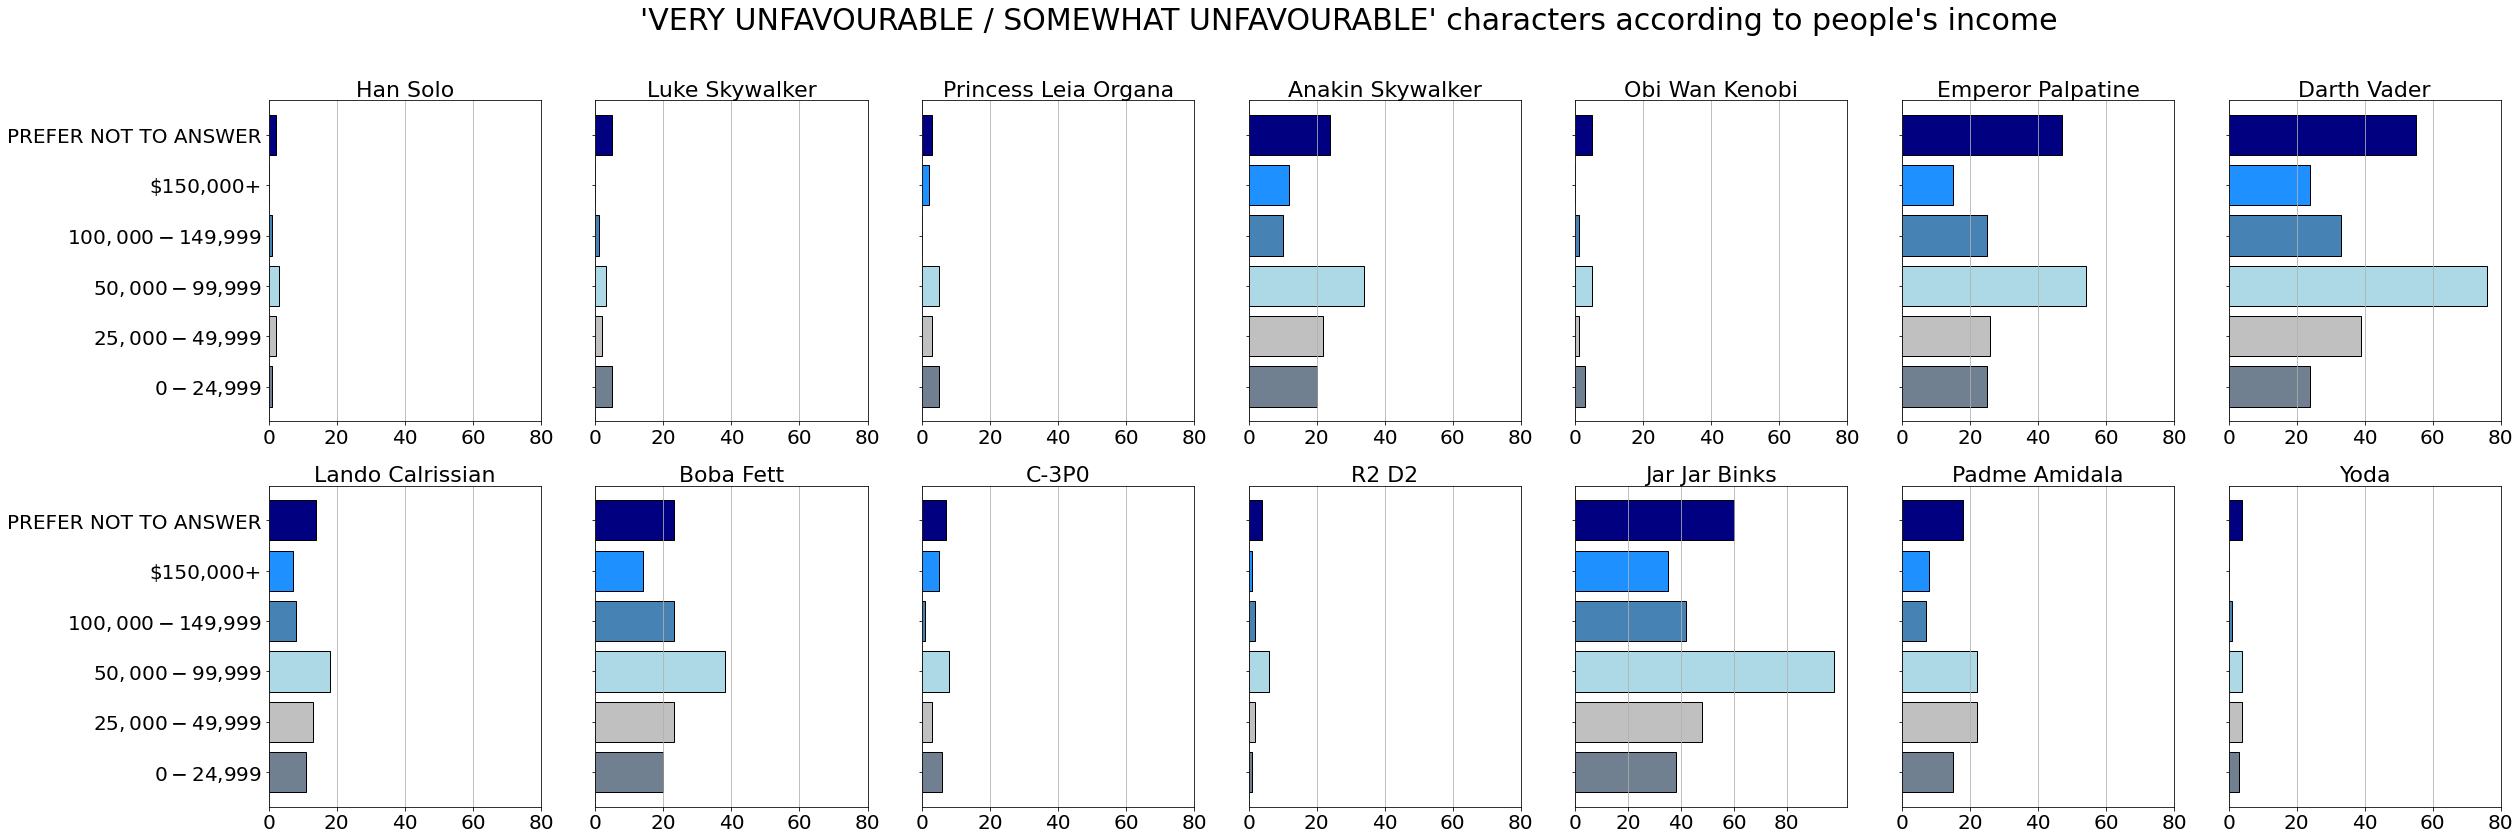

In [24]:
# create bar plots for all the 14 characters which are 'Very Unfavorable/ Somewhat Unfavorable' for different income groups 
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        income_count = watched_movie_df[(watched_movie_df[character] == characters_category[3]) | 
                            (watched_movie_df[character] == characters_category[4])]['Household Income'].value_counts(sort=False)
        ax[i][j].barh(income_category, income_count, color=income_colors, edgecolor='black')
        ax[i][j].set_xticks(range(0,100,20))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='x')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'VERY UNFAVOURABLE / SOMEWHAT UNFAVOURABLE' characters according to people's income", fontsize = 30)
plt.show()

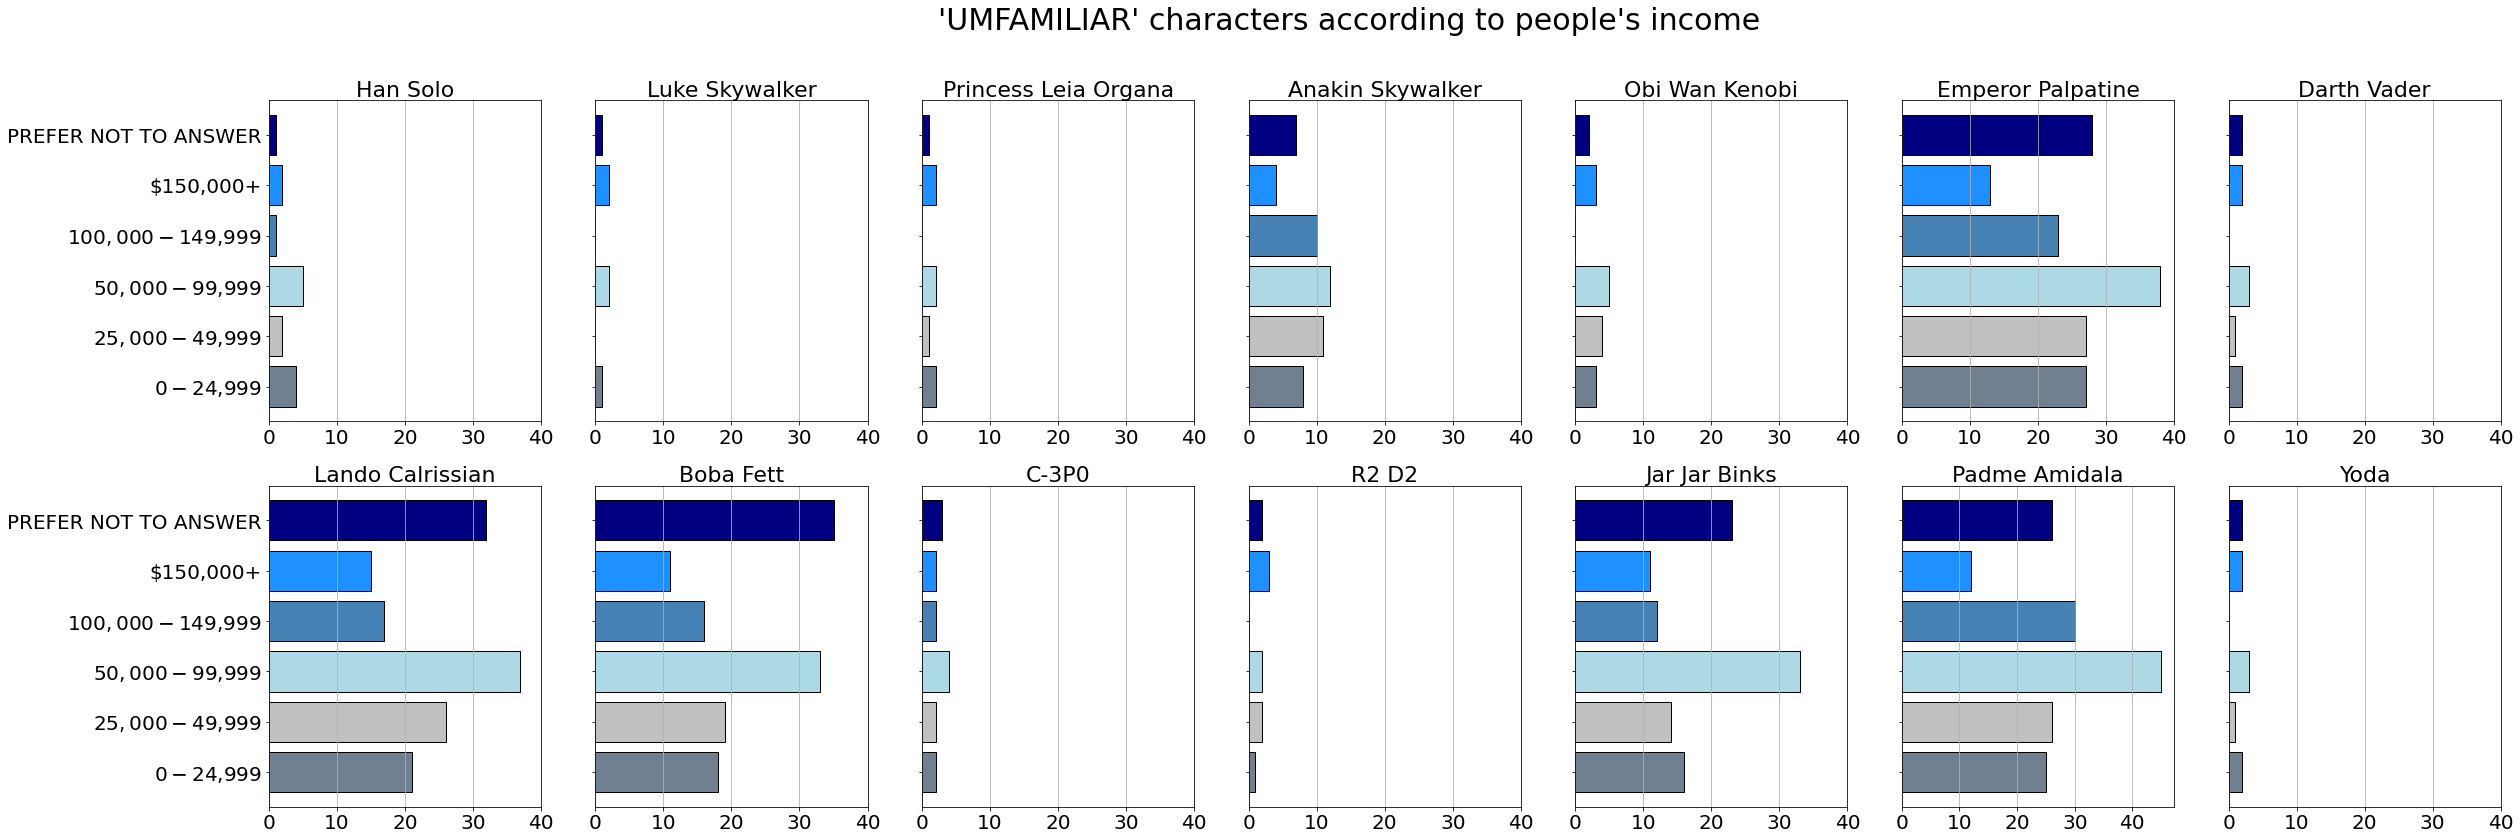

In [25]:
# create bar plots for all the 14 characters which are 'Unfamiliar' for different income groups 
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        income_count = watched_movie_df[watched_movie_df[character] == characters_category[5]]['Household Income'].value_counts(sort=False)
        ax[i][j].barh(income_category, income_count, color=income_colors, edgecolor='black')
        ax[i][j].set_xticks(range(0,50,10))
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].grid(axis='x')
        ax[i][j].set_title(character, fontsize = 22, pad=0.2)
        
fig.suptitle("'UMFAMILIAR' characters according to people's income", fontsize = 30)
plt.show()

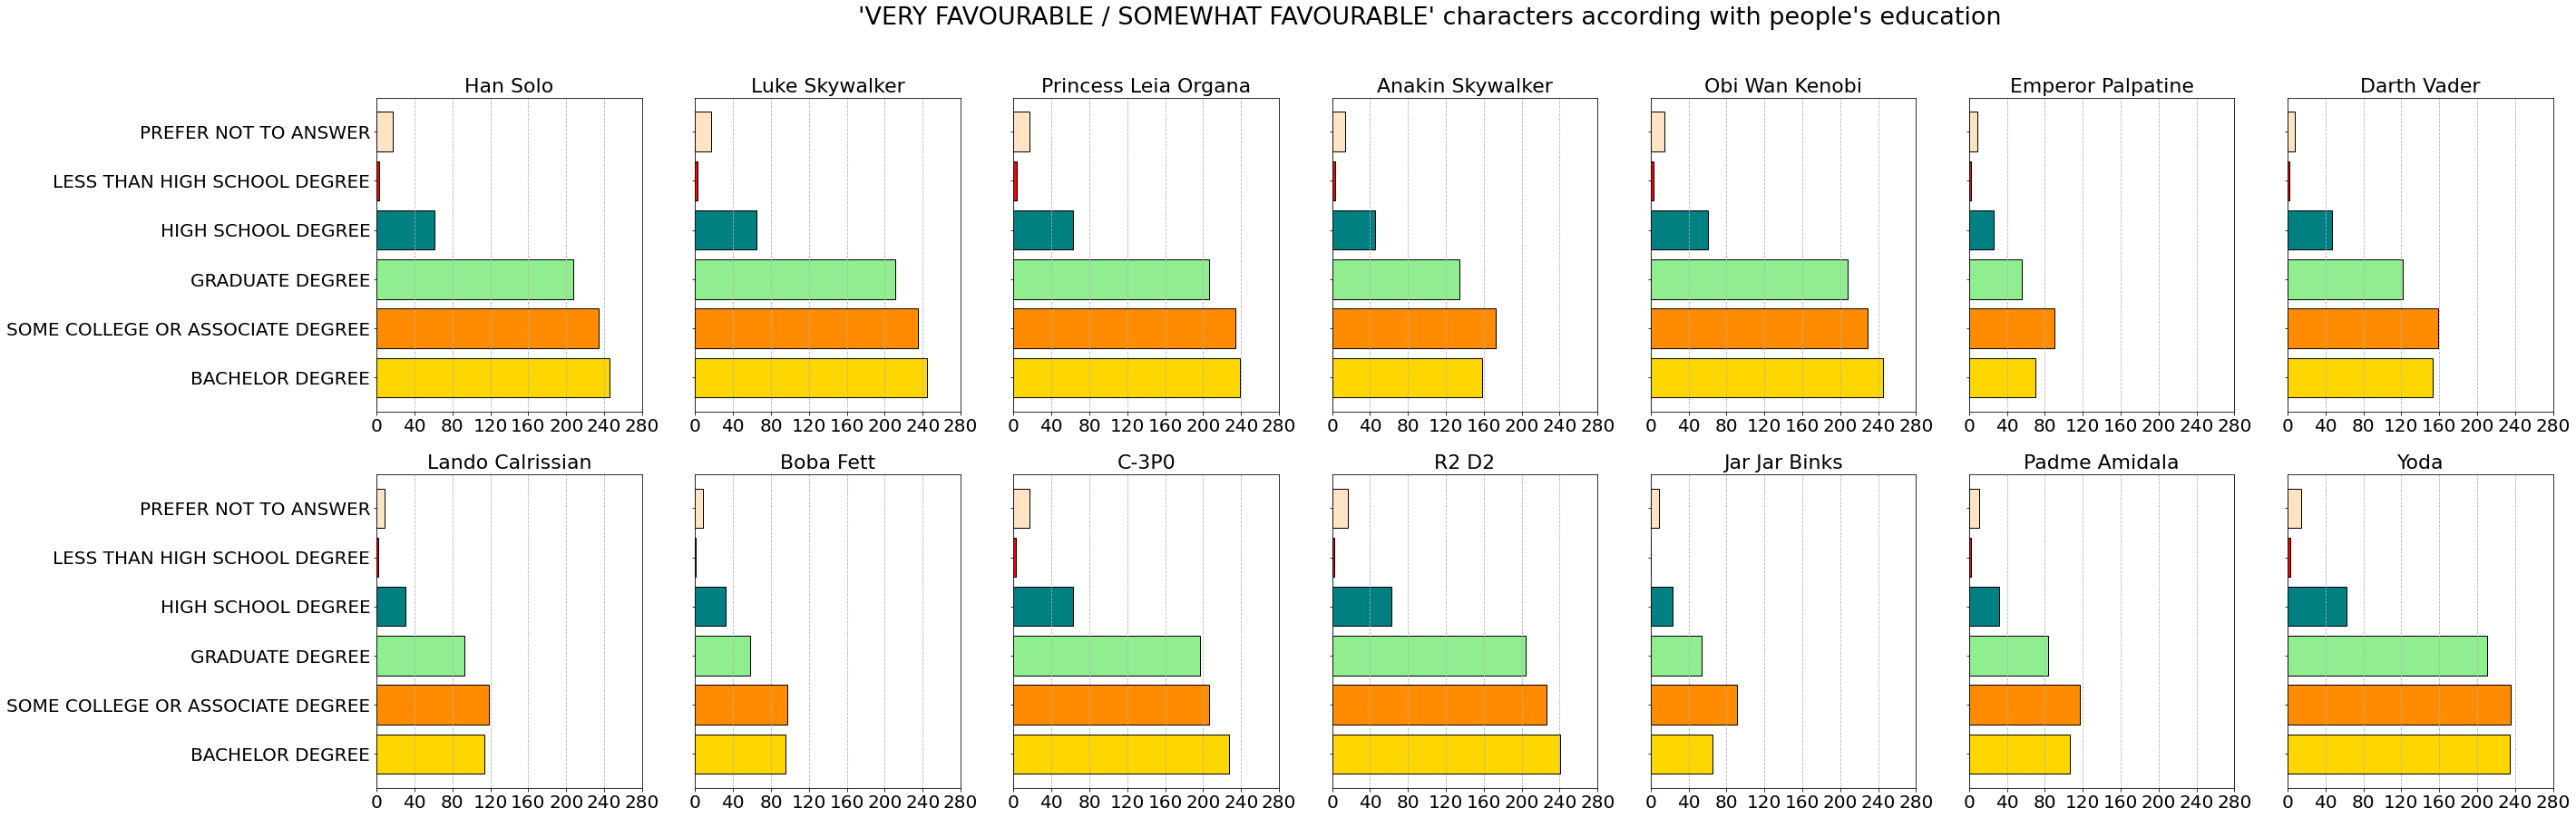

In [26]:
# Relationship with Education attribute

# create bar plots for all the 14 characters which are 'Very favorable/ Somewhat favorable' for different education categories
fig, ax = plt.subplots(2,7,figsize=(43,14), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        education_count = watched_movie_df[(watched_movie_df[character] == characters_category[0]) | 
                            (watched_movie_df[character] == characters_category[1])]['Education'].value_counts(sort=False)
        ax[i][j].barh(education_category, education_count, color=education_colors, edgecolor='black')
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_xticks(range(0,290,40))
        ax[i][j].grid(linestyle='--', axis='x')
        ax[i][j].set_title(character, fontsize = 22)
        
fig.suptitle("'VERY FAVOURABLE / SOMEWHAT FAVOURABLE' characters according with people's education", fontsize = 27)
plt.show()

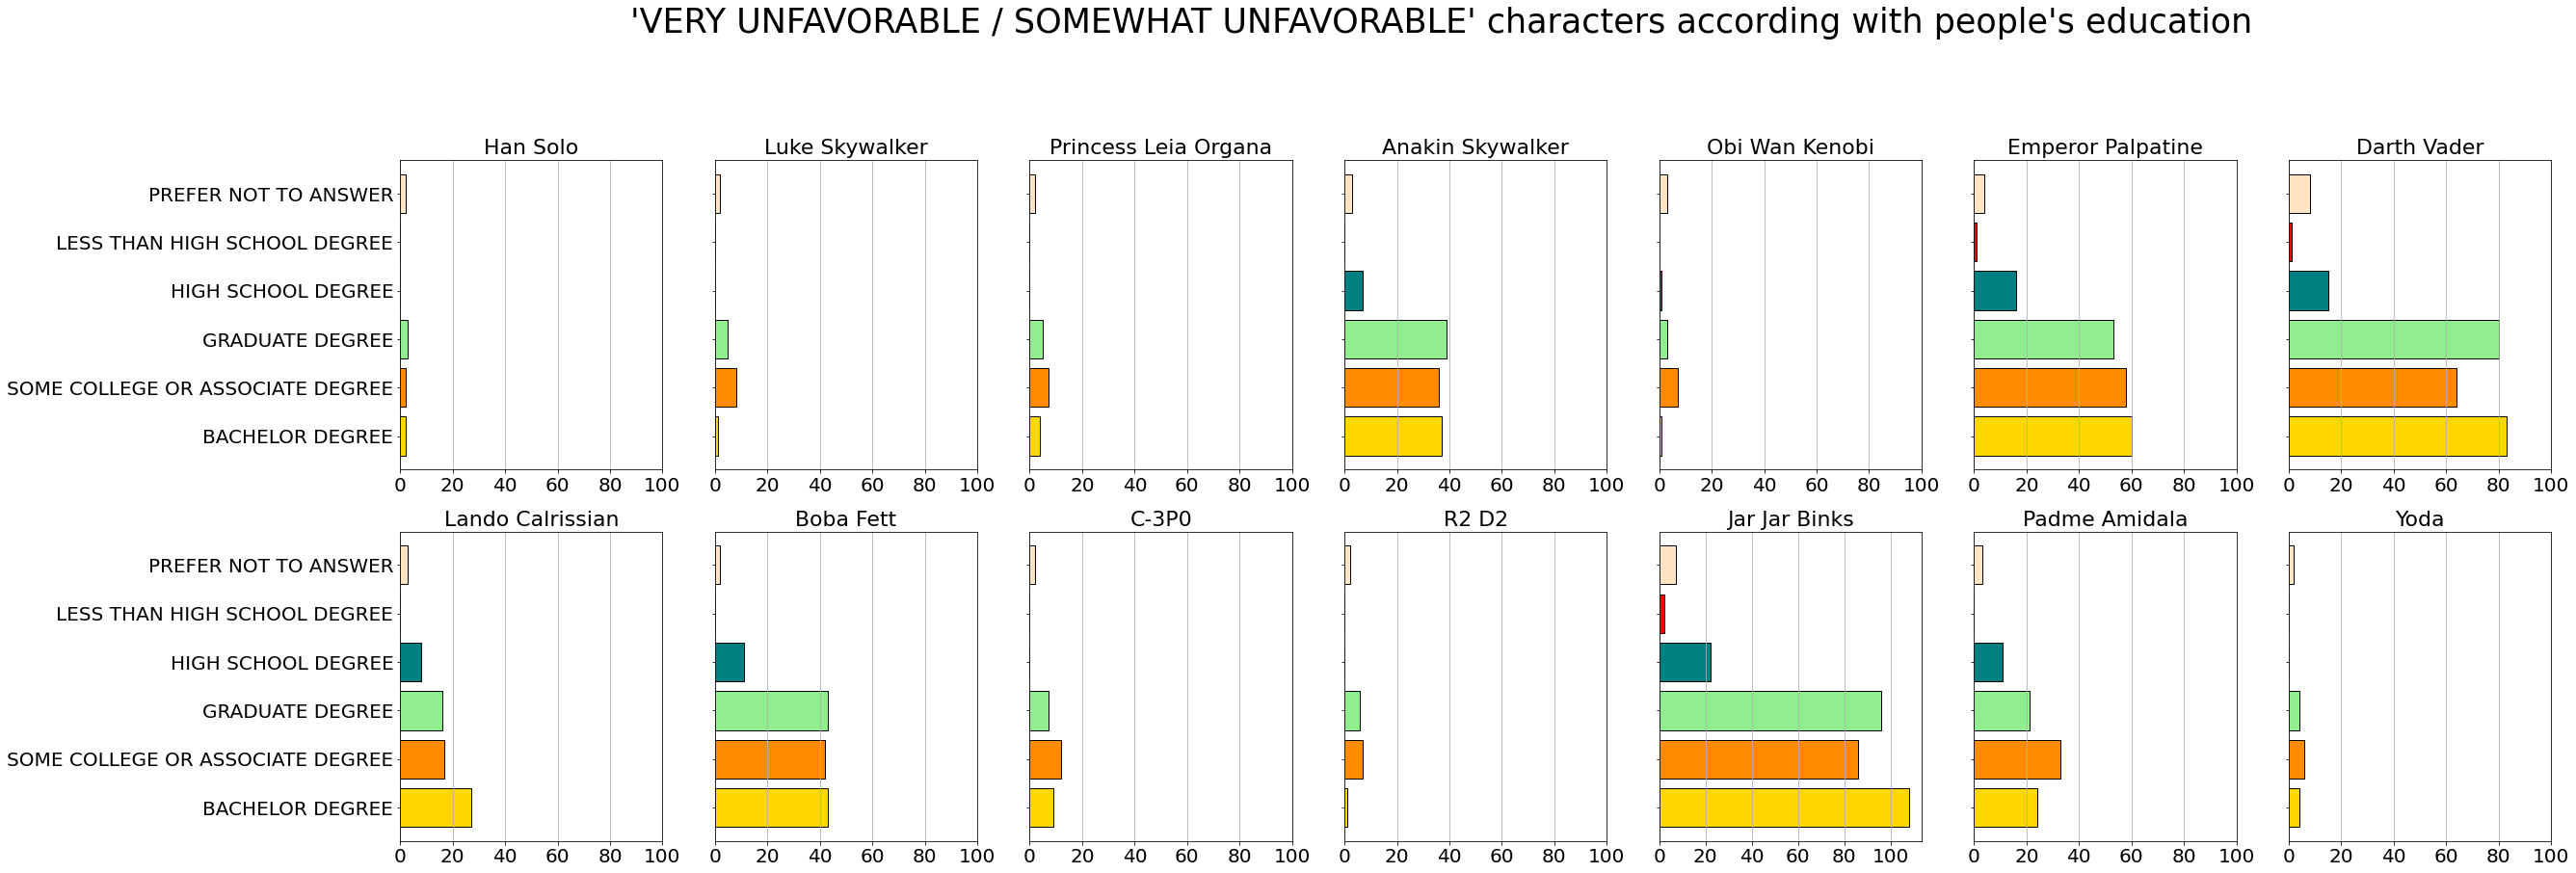

In [27]:
# create bar plots for all the 14 characters which are 'Very Unfavorable/ Somewhat Unfavorable' for different education categories
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        education_count = watched_movie_df[(watched_movie_df[character] == characters_category[4]) | 
                        (watched_movie_df[character] == characters_category[3])]['Education'].value_counts(sort=False)
        ax[i][j].barh(education_category, education_count, color=education_colors, edgecolor='black')
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_xticks(range(0,120,20))
        ax[i][j].grid(axis='x')
        ax[i][j].set_title(character, fontsize = 22)
        
fig.suptitle("'VERY UNFAVORABLE / SOMEWHAT UNFAVORABLE' characters according with people's education", fontsize = 35, y=1.05)
plt.show()

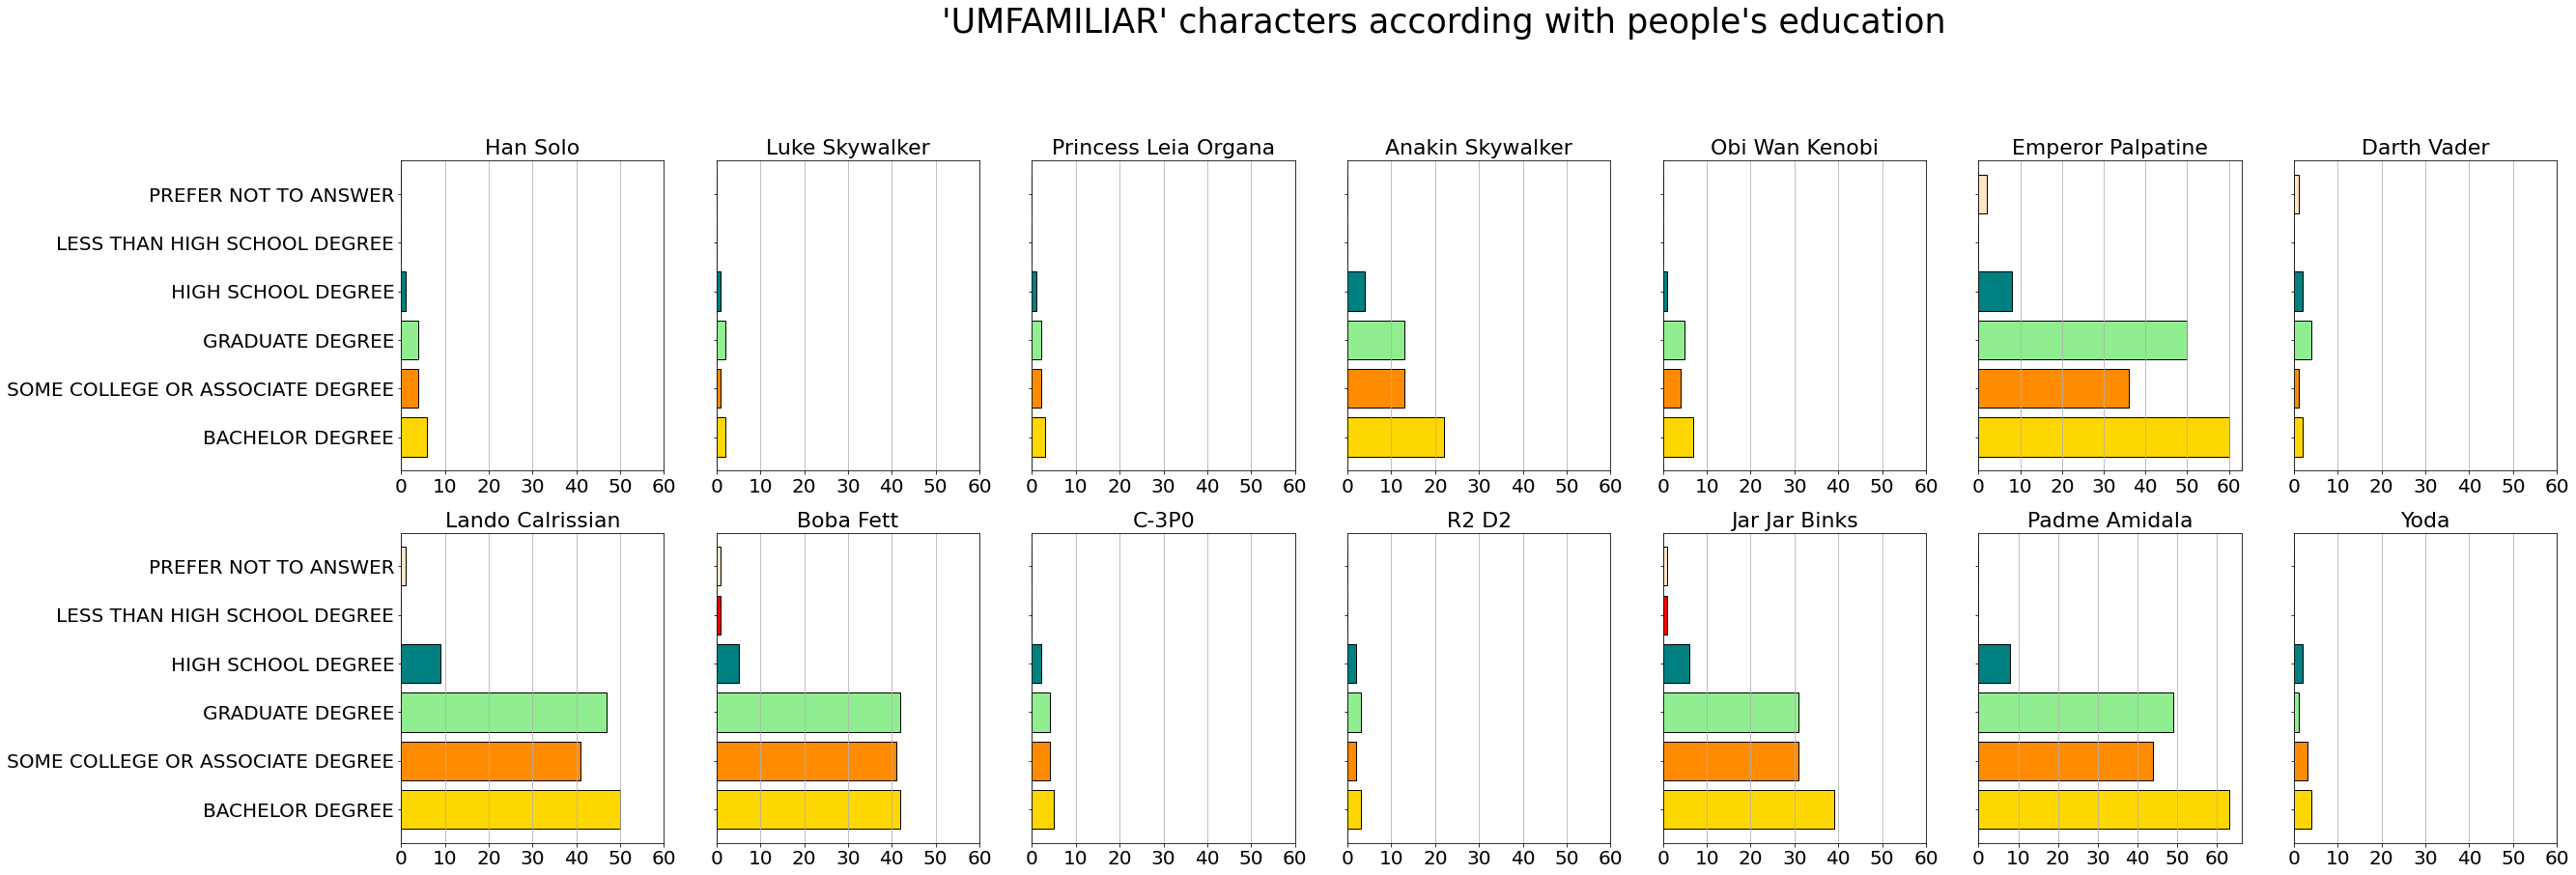

In [28]:
# create bar plots for all the 14 characters which are 'Unfamiliar' for different education categories
fig, ax = plt.subplots(2,7,figsize=(40,13), sharey=True)

for i, row_character in enumerate(character_arr):
    for j, character in enumerate(row_character):
        education_count = watched_movie_df[(watched_movie_df[character] == characters_category[5])]['Education'].value_counts(sort=False)
        ax[i][j].barh(education_category, education_count, color=education_colors, edgecolor='black')
        ax[i][j].tick_params(labelsize=20)
        ax[i][j].set_xticks(range(0,70,10))
        ax[i][j].grid(axis='x')
        ax[i][j].set_title(character, fontsize = 22)

fig.suptitle("'UMFAMILIAR' characters according with people's education", fontsize = 35, y=1.05)
plt.show()

# References

 1. "RMIT Learning Canvas", RMIT University. [Online]. Available: https://rmit.instructure.com/courses/67430/modules. [Accessed: 14- Apr- 2020]. 
 - "Categorical data", Pandas. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html. [Accessed: 14- Apr- 2020].
 - "Visualization — pandas 1.0.3 documentation", Pandas.pydata.org, 2020. [Online]. Available: https://pandas.pydata.org/docs/user_guide/visualization.html. [Accessed: 13- Apr- 2020].
 - "S. Ranjan, "Python | Pandas dataframe.applymap() - GeeksforGeeks", GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/python-pandas-dataframe-applymap/. [Accessed: 12- Apr- 2020].
 - "Categorical data", Pandas. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html. [Accessed: 14- Apr- 2020].
 - J. Hunter and E. Firing, "Group barchart with units — Matplotlib 3.1.2 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.1/gallery/units/bar_unit_demo.html. [Accessed: 14- Apr- 2020].
 - "Horizontal bar chart — Matplotlib 3.1.2 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html. [Accessed: 14- Apr- 2020].
 - B. Bhole, "Creating boxplots with Matplotlib", Blog.bharatbhole.com, 2013. [Online]. Available: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/. [Accessed: 14- Apr- 2020].
 - "Stacked Bar Graph — Matplotlib 3.1.2 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html. [Accessed: 14- Apr- 2020].
 - "List of named colors — Matplotlib 3.1.0 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.0/gallery/color/named_colors.html. [Accessed: 14- Apr- 2020].
 - "matplotlib.pyplot.legend — Matplotlib 3.2.1 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html. [Accessed: 14- Apr- 2020].
 - "Composing Custom Legends — Matplotlib 3.1.2 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html. [Accessed: 14- Apr- 2020].
 - "Legend guide — Matplotlib 3.2.1 documentation", Matplotlib.org. [Online]. Available: https://matplotlib.org/tutorials/intermediate/legend_guide.html. [Accessed: 14- Apr- 2020].